Importy

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# pd.set_option('display.max_rows', 15)

Wczytanie danych

In [98]:
df = pd.read_excel('Dataset20_21.xlsx')
df.rename(columns=lambda x: x.replace(" (20/21)", ""), inplace=True)
df.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

  Contract Years Left          League      Squad    MP  ...  Offsides  \
0                   1         Ligue 1  Paris S-G  31.0  ...      17.0   
1                   3      Bundesliga   Dortmund  28.0  ...      15.0   
2                   3  Premier League  Tottenham  35.0  ...      12.0   
3                   5  Premier League   Dortmund  26.0  ...       9.0   
4                   2  Premier League  Liverpool  37.0  ...      13.0   

   Crosses  Interceptions  Penalty Kicks Won  Penalties Conceded  Own Goals  \
0     68.0            7.0                4.0                 0.0        0.0   
1     13.0            5.0                0.0                 0.0        0.0   
2     37.0           15.0                2.0                 0.0        0.0   
3     52.0           14.0                0.0                 0.0        0.0   
4     47.0            9.0                2.0                 0.0        0.0   

   Total Loose Balls Recovered  Aerial Duel Won  Aerial Duel Lost  \
0                        109.0              7.0               8.0   
1                         96.0             37.0              40.0   
2                        155.0             90.0             129.0   
3                        154.0              5.0              22.0   
4                        191.0             21.0              52.0   

   % Aerial Duels Won  
0                46.7  
1                48.1  
2                41.1  
3                18.5  
4                28.8  

[5 rows x 143 columns]

In [99]:
len(df)

2075

In [100]:
df.columns.to_list()

['Player',
 'Club',
 'Age',
 'Position',
 'Nation',
 'Value',
 'Contract Years Left',
 'League',
 'Squad',
 'MP',
 'Starts',
 'Min',
 'Total Mins/90',
 'Gls',
 'Ast',
 'Non-Penalty Goals',
 'Penalties Scored',
 'Penalties Attempted',
 'Yellow Cards',
 'Red Cards',
 'Gls/90',
 'Ast/90',
 '(G+A)/90',
 'Non-Penalty Goals/90',
 '(Gls+Ast-Scored Penalties)/90',
 'xG',
 'Non-Penalty xG',
 'xA',
 'Non-penalty xG+ xA',
 'xG/90',
 'xA/90',
 '(xG+xA)/90',
 'Non-Penalty xG/90',
 '(Non-Penalty xG+xA)/90',
 'Total Shots',
 'Total Shots on Target',
 'Shots on Target%',
 'Shots/90',
 'Shots on Target/90',
 'Goals/Shots',
 'Goals/Shots on Target',
 'Avg Shot Distance (yds)',
 'Freekick Shots',
 'Non-Penalty xG/Shots',
 'Goals Scored minus xG',
 'Non-Penalty Goals Scored minus Non-Penalty xG',
 'Shot-Creating Actions',
 'Shot-Creating Actions/90',
 'Passes Leading to Shot Attempt',
 'Set-Piece Leading to Shot Attempt',
 'Dribbles Leading to Shot Attempt',
 'Shots Leading to Shot Attempt',
 'Fouls Drawn

Zostawiamy tylko piłkarzy, którzy zagrali powyżej 15 meczów

In [101]:
df_15 = df[df['MP'] > 15]
df_15.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

  Contract Years Left          League      Squad    MP  ...  Offsides  \
0                   1         Ligue 1  Paris S-G  31.0  ...      17.0   
1                   3      Bundesliga   Dortmund  28.0  ...      15.0   
2                   3  Premier League  Tottenham  35.0  ...      12.0   
3                   5  Premier League   Dortmund  26.0  ...       9.0   
4                   2  Premier League  Liverpool  37.0  ...      13.0   

   Crosses  Interceptions  Penalty Kicks Won  Penalties Conceded  Own Goals  \
0     68.0            7.0                4.0                 0.0        0.0   
1     13.0            5.0                0.0                 0.0        0.0   
2     37.0           15.0                2.0                 0.0        0.0   
3     52.0           14.0                0.0                 0.0        0.0   
4     47.0            9.0                2.0                 0.0        0.0   

   Total Loose Balls Recovered  Aerial Duel Won  Aerial Duel Lost  \
0                        109.0              7.0               8.0   
1                         96.0             37.0              40.0   
2                        155.0             90.0             129.0   
3                        154.0              5.0              22.0   
4                        191.0             21.0              52.0   

   % Aerial Duels Won  
0                46.7  
1                48.1  
2                41.1  
3                18.5  
4                28.8  

[5 rows x 143 columns]

In [102]:
len(df_15)

1512

Wykres rozkładu wartości piłkarzy

Text(0, 0.5, 'Liczebność')

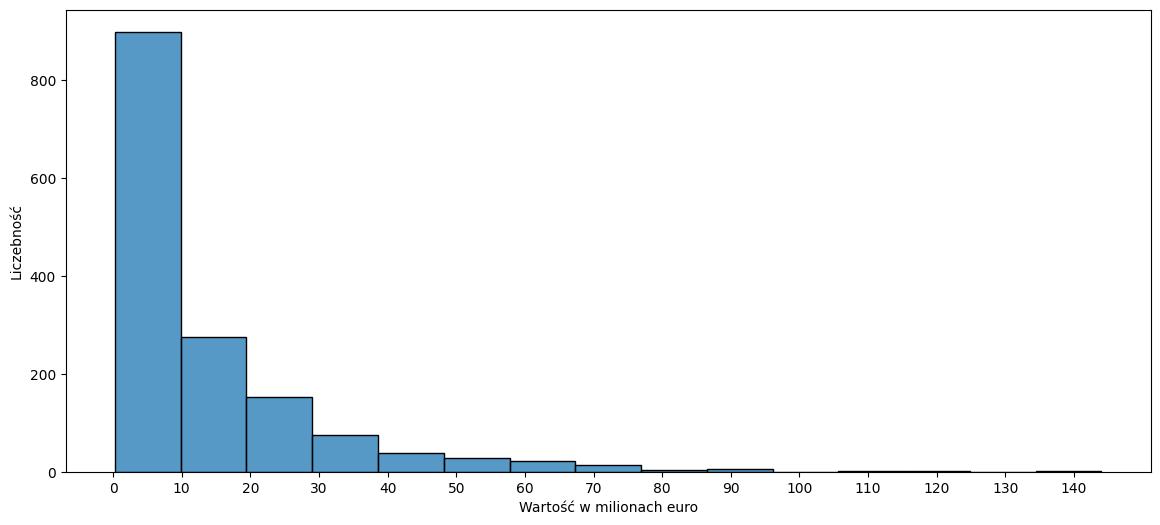

In [103]:
plt.figure(figsize=(14,6))
sns.histplot(df_15['Value'].mul(0.000001), bins=15)  # zamiana na miliony
plt.xticks(np.arange(0, 150, 10))
plt.xlabel("Wartość w milionach euro")
plt.ylabel("Liczebność")

In [104]:
df_15['Age'].value_counts() # rozkład wieku

Age
24    145
26    134
27    129
28    126
25    126
29    121
23    115
30    107
31     86
22     83
21     66
32     60
33     57
34     53
20     27
19     18
35     18
36     14
18     11
37      7
38      5
39      3
40      1
Name: count, dtype: int64

Wykres korelacji wieku do wartości piłkarzy

Text(0, 0.5, 'Średnia wartość w milionach euro')

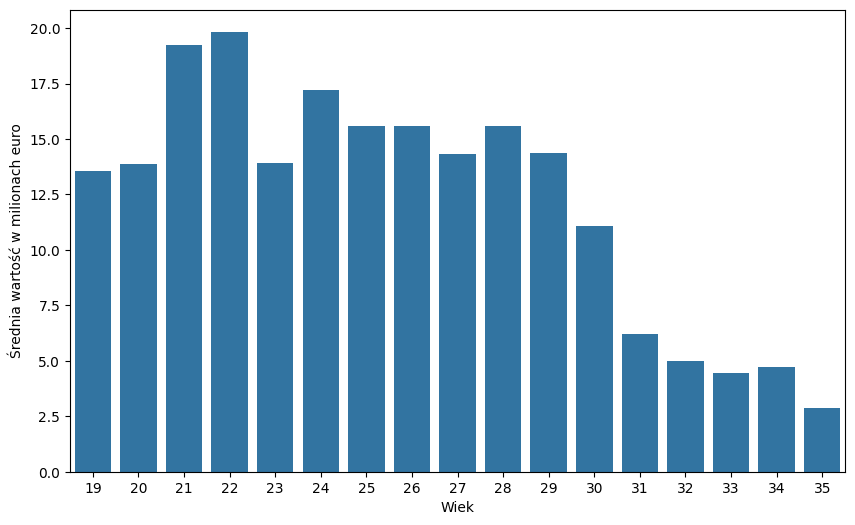

In [105]:
# usuwamy wartości, które występują mniej niż 15 razy
counts = df_15['Age'].value_counts()
tempdf = df_15[~df_15['Age'].isin(counts[counts < 15].index)]

# daatframe sredniej wartosci na kazdy wiek
tempdf = tempdf.groupby('Age')['Value'].mean()


# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() # zamiana na miliony

plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Avg Value in Millions', data=tempdf)
plt.xlabel('Wiek')  # Nowa nazwa osi X
plt.ylabel('Średnia wartość w milionach euro')  # Nowa nazwa osi Y

Korelacja pozycji do wartości piłkarzy

In [106]:
df_15['Position'].value_counts()

Position
Defender      516
midfield      465
attack        432
Goalkeeper     99
Name: count, dtype: int64

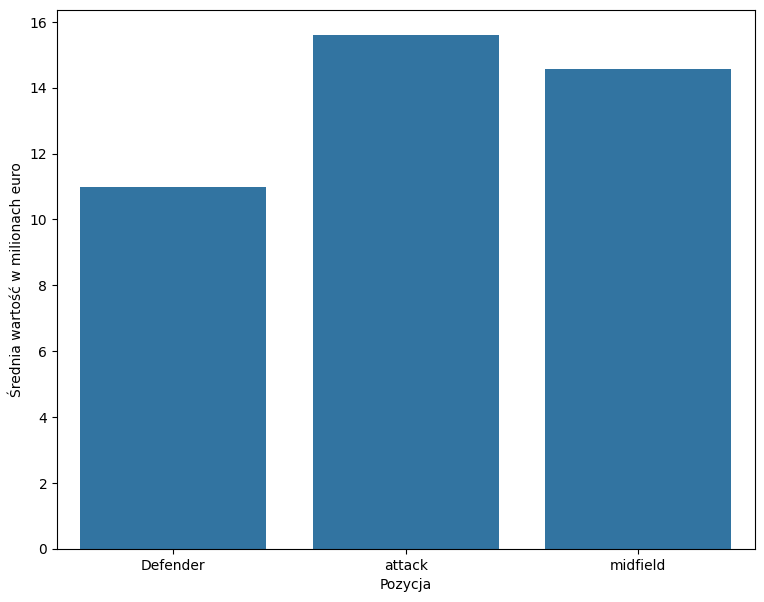

In [107]:
# dataframe ze srednia wartoscia dla kazdej pozycji

# Grupowanie danych według 'Position' i obliczanie średniej wartości 'Value'
tempdf = df_15.groupby('Position')['Value'].mean()

# Zamiana wartości na miliony euro
tempdf = tempdf.mul(0.000001).rename('Średnia wartość w milionach euro').reset_index()

# Zmiana nazwy kolumny 'Position' na 'Pozycja'
tempdf.rename(columns={'Position': 'Pozycja'}, inplace=True)

# Usunięcie pozycji "Goalkeeper" z DataFrame
tempdf = tempdf[tempdf['Pozycja'] != 'Goalkeeper']

# Tworzenie wykresu
plt.figure(figsize=(9,7))
sns.barplot(x='Pozycja', y='Średnia wartość w milionach euro', data=tempdf)
plt.xlabel('Pozycja')
plt.ylabel('Średnia wartość w milionach euro')
plt.show()

Korelacja ligi i wartości piłkarzy

In [108]:

df_15['League'].value_counts()

League
Serie A           324
La Liga           322
Premier League    321
Ligue 1           280
Bundesliga        265
Name: count, dtype: int64

<Axes: xlabel='Liga', ylabel='Średnia wartość w milionach euro'>

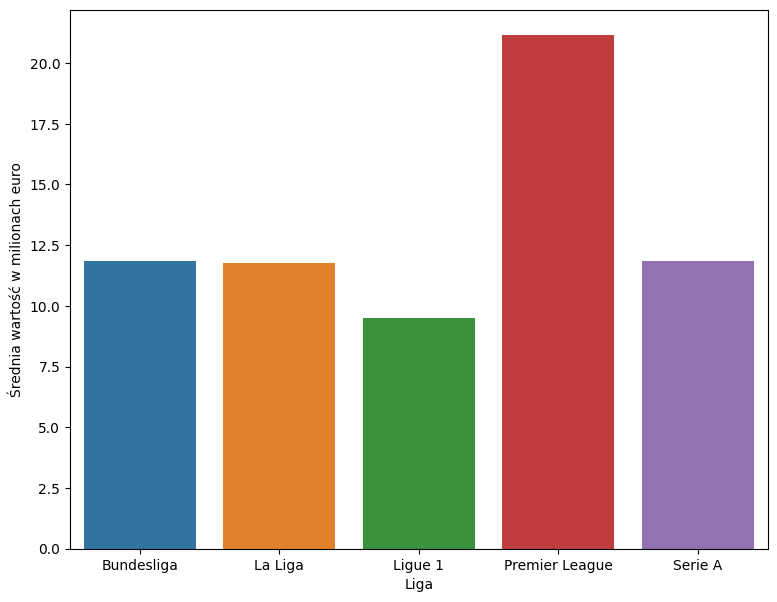

In [109]:
# dataframe ze srednia wartoscia dla kazdej ligi
tempdf = df_15.groupby('League')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() # znow na miliony, moze jednak lepiej bylo podzielic to na poczatku

plt.figure(figsize=(9,7))
plt.xlabel('Liga')
plt.ylabel('Średnia wartość w milionach euro')
sns.barplot(x='League', y='Avg Value in Millions', hue='League', data=tempdf )

Korelacja lat do konca kontraktu i wartości piłkarzy

In [110]:
df_15['Contract Years Left'].value_counts()

Contract Years Left
2       423
3       386
1       376
4       208
5        74
fail     30
6        12
7         1
10        1
0         1
Name: count, dtype: int64

Text(0, 0.5, 'Średnia wartość w milionach euro')

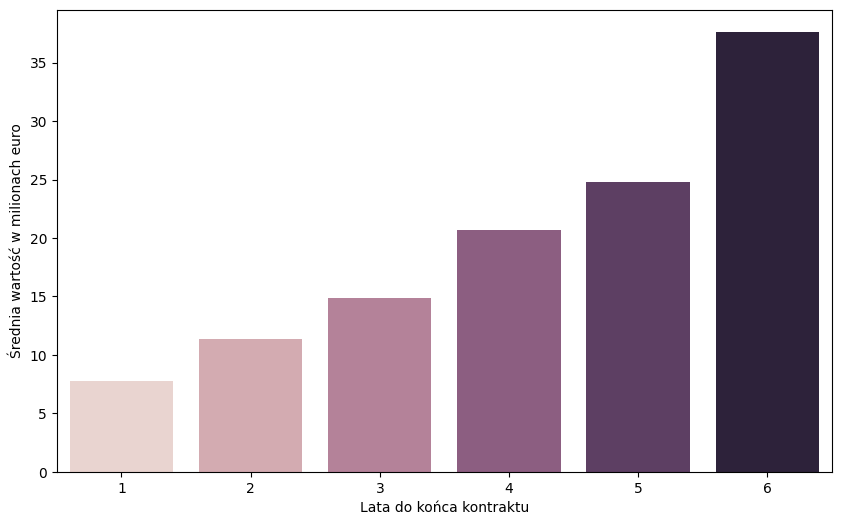

In [111]:
# bierzemy tylko takie kontrakty, które występują więcej niż 5 razy, bo przykladowo pilkarz ktory ma kontarkt na 10 lat,
# jest nie dokupienia, a wystepuje tylko raz, nie wnoszac nic do analizy 
counts = df_15['Contract Years Left'].value_counts()
tempdf = df_15[~df_15['Contract Years Left'].isin(counts[counts < 5].index)]

# dataframe ze srednia wartoscia dla kazdej ilosci lat w kontrakcie
tempdf = tempdf[tempdf['Contract Years Left'] != 'fail']
tempdf = tempdf.groupby('Contract Years Left')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 

plt.figure(figsize=(10,6))
sns.barplot(x='Contract Years Left', y='Avg Value in Millions', hue='Contract Years Left', data=tempdf, legend=False)
plt.xlabel('Lata do końca kontraktu')
plt.ylabel('Średnia wartość w milionach euro')

Korelacja miedzy krajem a wartością piłkarzy

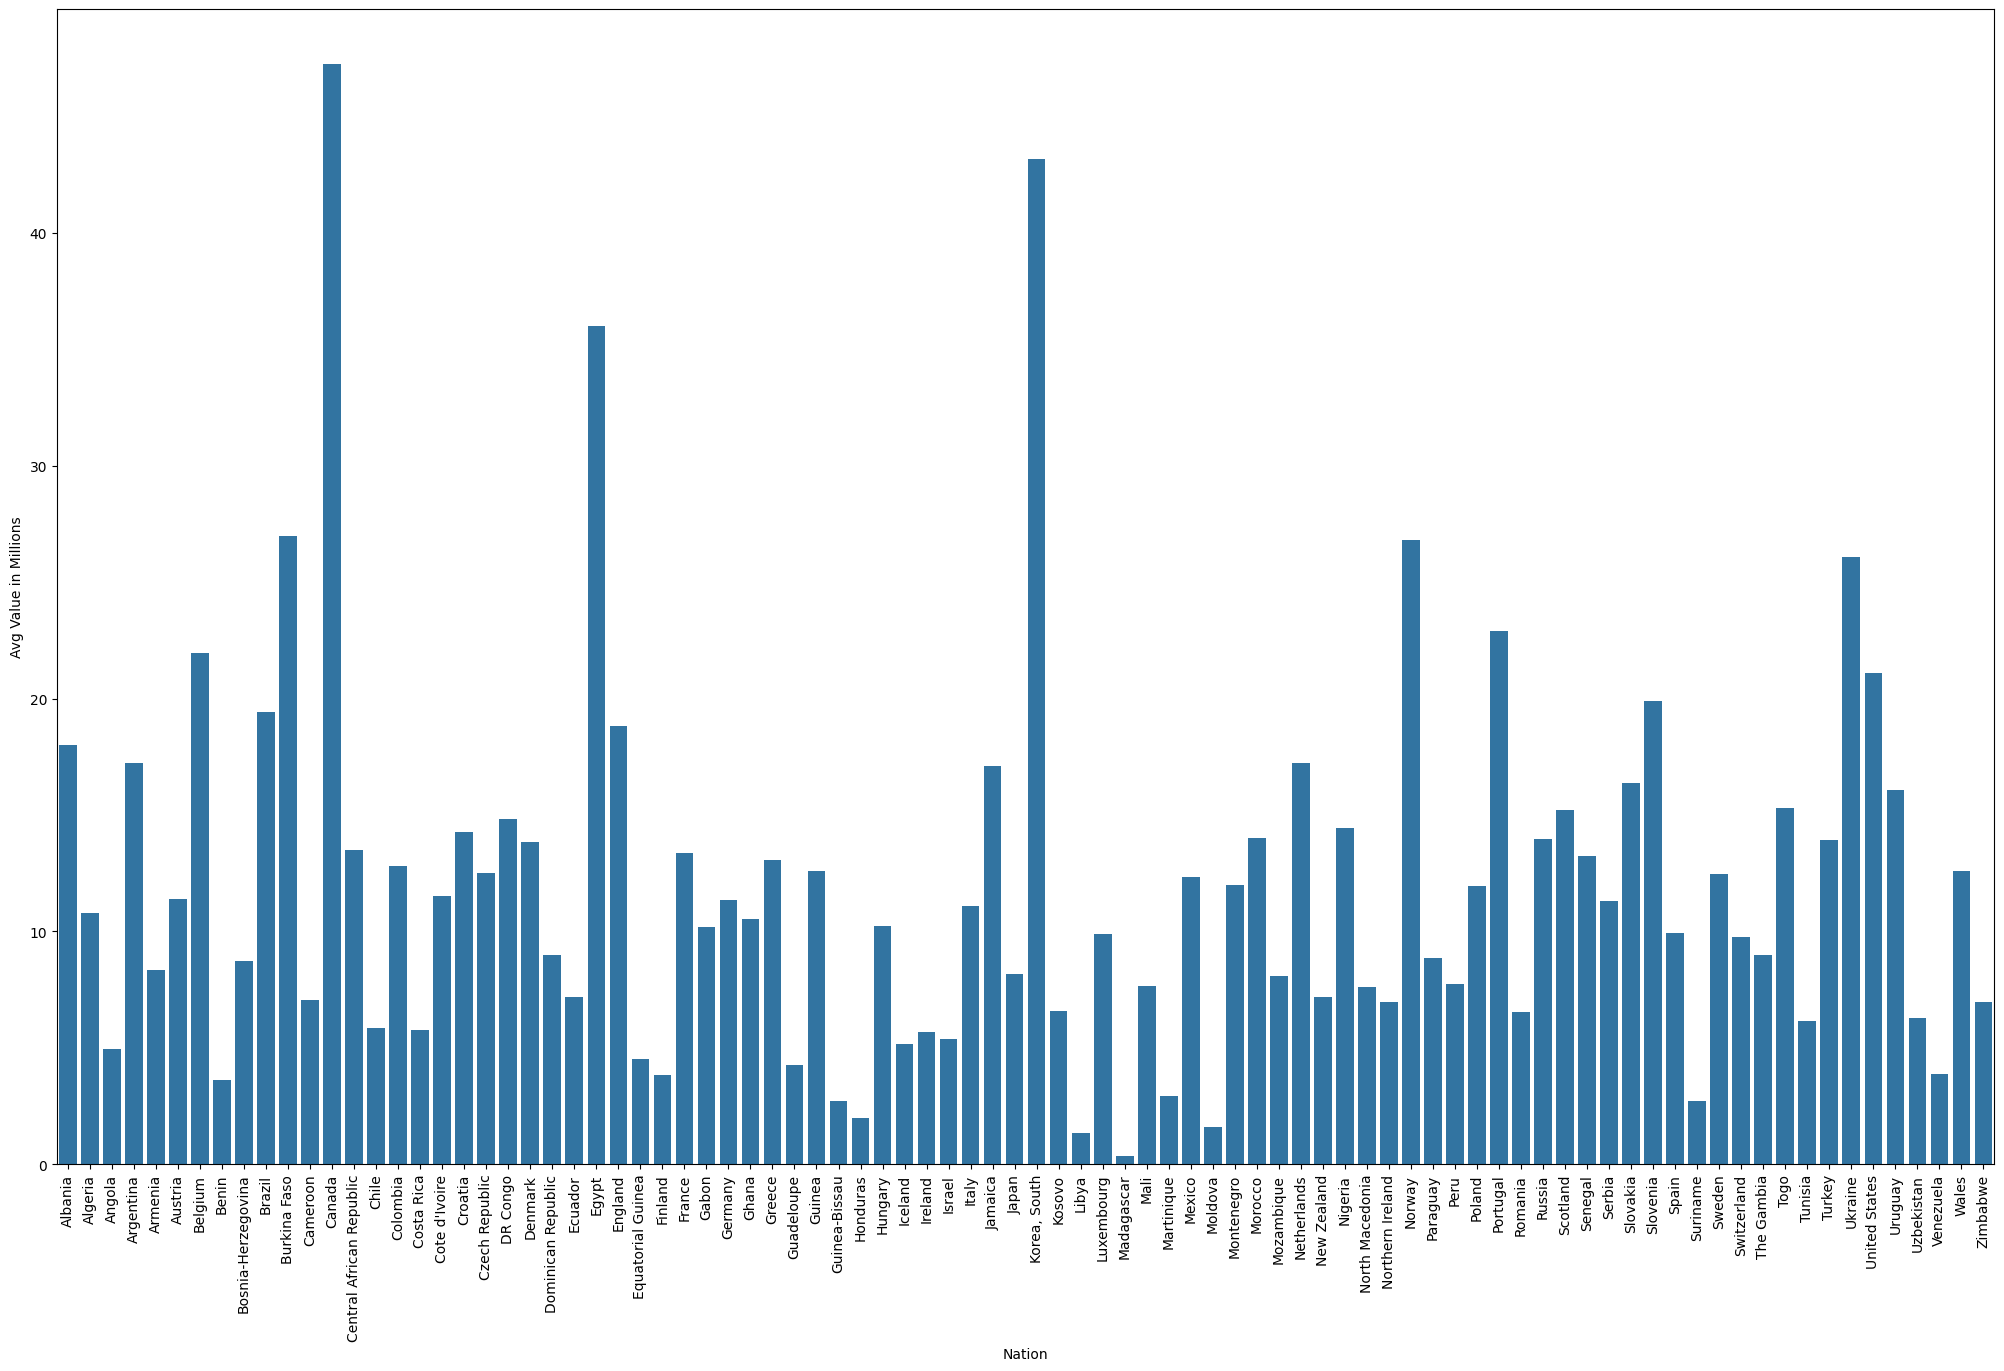

In [112]:
# df ze srednia wartoscia dla kazdego narodu
tempdf = df_15.groupby('Nation')['Value'].mean()

# wykres
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 

plt.figure(figsize=(25,15))
sns.barplot(x='Nation', y='Avg Value in Millions', data=tempdf)
xticks = plt.xticks(rotation=90)

Korelacja miedzy gole + asysty na 90 minut, a wartoscią napastników

Text(0.5, 0, 'Goals + Assists per 90 mins (Attackers)')

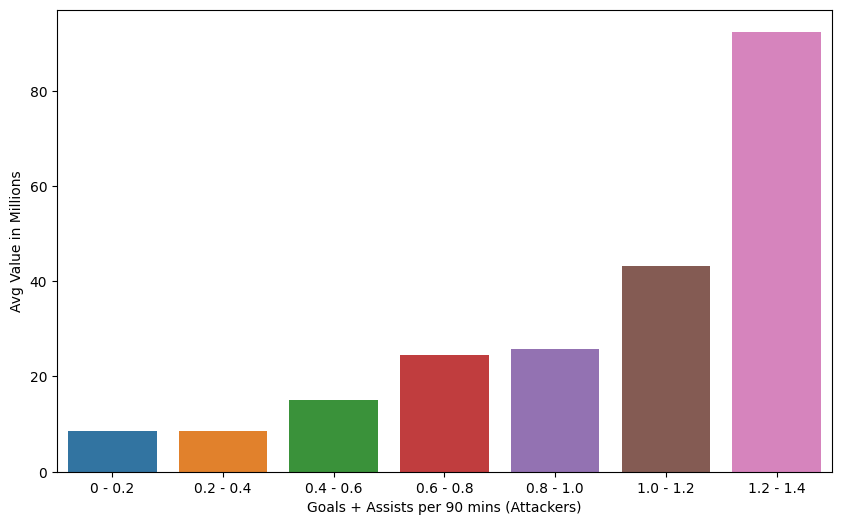

In [113]:
# df dla napastnikow
df_attack = df_15[df_15['Position'] == 'attack'].copy()

# cutujemy dane na 7 przedzialow
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
group_names = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0 - 1.2', '1.2 - 1.4']
df_attack['Cuts'] = pd.cut(df_attack['(G+A)/90'], bins, labels=group_names)

# wykres
tempdf = df_attack.groupby('Cuts', observed=True)['Value'].mean()
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() 



plt.figure(figsize=(10,6))
sns.barplot(x='Cuts', y='Avg Value in Millions', hue='Cuts', data=tempdf)
plt.xlabel("Goals + Assists per 90 mins (Attackers)")

Zostawiam tylko kolumny numeryczne

In [114]:
df_numeric = df_15.select_dtypes(include=['number'])

Kolumny posortowane od najsilniejszej korelacji z Value

In [115]:
x = pd.DataFrame(df_numeric.corr()['Value'])
x

Value
Age                         -0.264730
Value                        1.000000
MP                           0.238468
Starts                       0.261085
Min                          0.265660
...                               ...
Own Goals                   -0.008410
Total Loose Balls Recovered  0.151138
Aerial Duel Won              0.035300
Aerial Duel Lost             0.063955
% Aerial Duels Won          -0.050386

[136 rows x 1 columns]

In [116]:
x = x.sort_values('Value', ascending=False) 
x = x[x['Value']>0.4]
x


Value
Value                                               1.000000
Goal Creating Actions                               0.486852
Number of Times Player was Pass Target              0.484844
Passes Leading to Goals                             0.478690
Total Carries in Forward Direction                  0.478071
Non-penalty xG+ xA                                  0.475322
Passes Leading to Shot Attempt                      0.467209
Touches in Attacking Penalty Box                    0.460145
Shot-Creating Actions                               0.450528
Carries into Attacking Penalty Box                  0.448627
Touches in Attacking 3rd                            0.442749
Total Shots                                         0.433882
Number of Times Received Pass                       0.427120
Total Shots on Target                               0.426372
xA                                                  0.423902
xG Assisted                                         0.423902
xG                                                  0.421759
Total Carries                                       0.420845
Non-Penalty xG                                      0.420404
Gls                                                 0.415198
Total Assists                                       0.412017
Ast                                                 0.412017
Carries into Final Third                            0.409137
Non-Penalty Goals                                   0.405680
Total Distance Carried the Ball                     0.405000
Passes Attempted (Short Passes)                     0.404230
Total Distance Carried the Ball in Forward Dire...  0.403948

<Axes: >

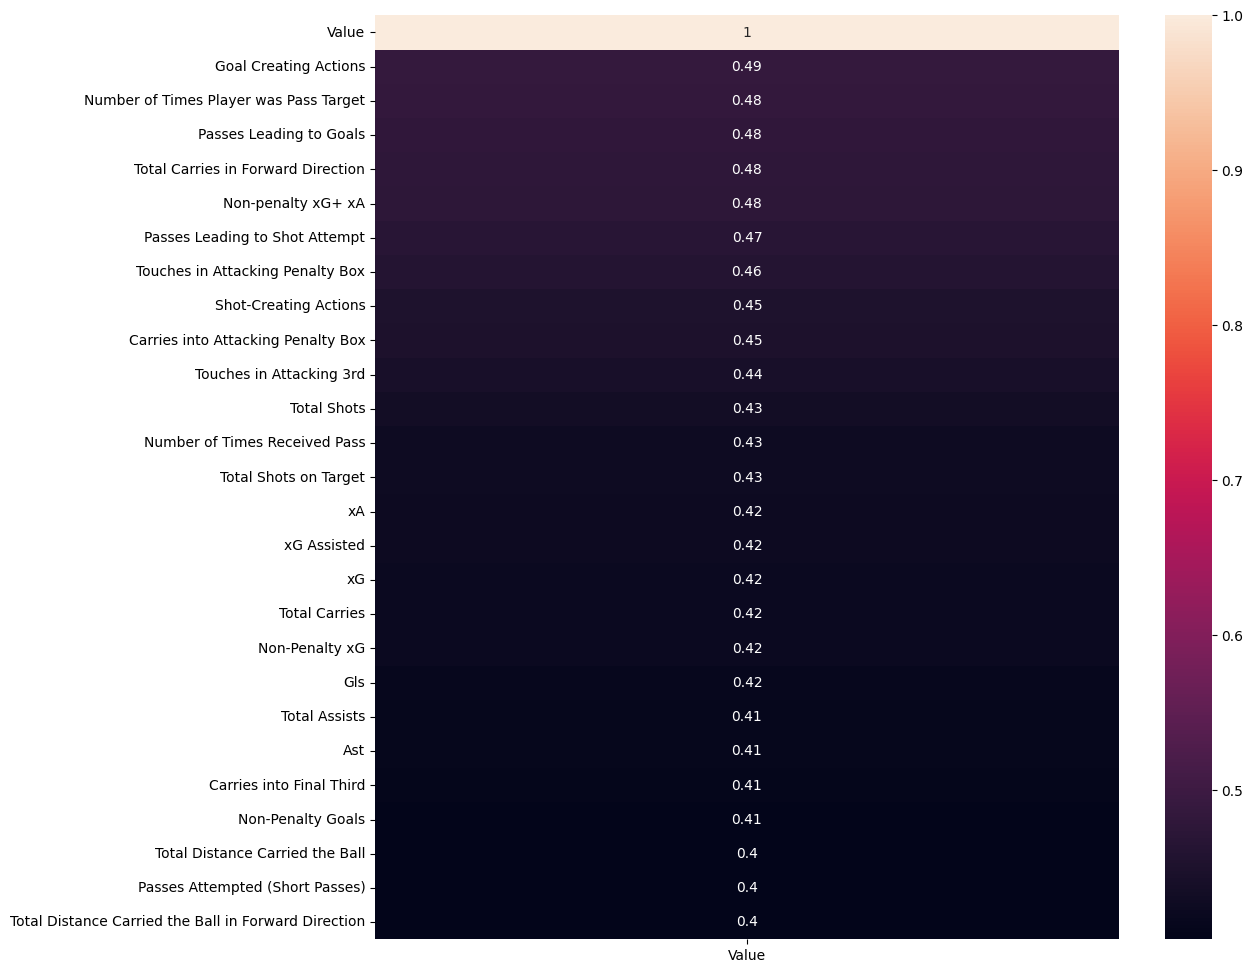

In [117]:
# wykres
plt.figure(figsize=(12,12))
sns.heatmap(data=x.sort_values('Value', ascending=False), annot=True)

In [118]:
df_15.columns[df_15.isnull().sum() > 0].tolist() # kolumny z brakujacymi wartosciami

['Shots on Target%',
 'Goals/Shots',
 'Goals/Shots on Target',
 'Avg Shot Distance (yds)',
 'Non-Penalty xG/Shots',
 'Dribble Success %',
 'Pass Completion % (Long Passes)',
 '% of Dribblers Tackled',
 'Successful Pressure %',
 '% Aerial Duels Won']

Usuwamy kolumny z brakujacymi danymi i te nienumeryczne

In [119]:
df_ML = df_15.drop(['Shots on Target%',
 'Goals/Shots',
 'Goals/Shots on Target',
 'Avg Shot Distance (yds)',
 'Non-Penalty xG/Shots',
 'Dribble Success %',
 'Pass Completion % (Long Passes)',
 '% of Dribblers Tackled',
 'Successful Pressure %',
 '% Aerial Duels Won',
 'Player',
 'Nation',
 'Squad'], axis=1)

df_ML['Club'].unique() # lista klubow

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester United', 'Liverpool FC', 'Manchester City',
       'Chelsea FC', 'Bayern Munich', 'FC Barcelona',
       'Atlético de Madrid', 'Inter Milan', 'Juventus FC',
       'Real Sociedad', 'SS Lazio', 'Real Madrid', 'West Ham United',
       'Arsenal FC', 'Sevilla FC', 'Leicester City', 'AC Milan',
       'Everton FC', 'RB Leipzig', 'Villarreal CF', 'SSC Napoli',
       'Bayer 04 Leverkusen', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Olympique Lyon', 'AS Roma', 'Valencia CF', 'ACF Fiorentina',
       'Leeds United', 'Olympique Marseille', 'Aston Villa',
       'US Sassuolo', 'Borussia Mönchengladbach', 'Eintracht Frankfurt',
       'LOSC Lille', 'Atalanta BC', 'AS Monaco', 'Torino FC',
       'Southampton FC', 'VfL Wolfsburg', 'OGC Nice', 'Newcastle',
       'TSG 1899 Hoffenheim', 'Stade Rennais FC', 'Burnley FC',
       'Brighton &amp; Hove Albion', 'VfB Stuttgart',
       'Real Betis Balompi

Sortujemy kluby po najwyzszej sredniej wartosci rynkowej i zrobimy 4 kategorie

In [120]:
x = df_ML.groupby('Club')['Value'].mean().sort_values(ascending=False)
y = pd.DataFrame(x)
z = y.reset_index()        
z['Club'].to_list()

['Manchester City',
 'Liverpool FC',
 'Bayern Munich',
 'Manchester United',
 'Paris Saint-Germain',
 'Chelsea FC',
 'Atlético de Madrid',
 'FC Barcelona',
 'Tottenham Hotspur',
 'Real Madrid',
 'Juventus FC',
 'Borussia Dortmund',
 'Inter Milan',
 'SSC Napoli',
 'RB Leipzig',
 'Arsenal FC',
 'Leicester City',
 'Everton FC',
 'Wolverhampton Wanderers',
 'Aston Villa',
 'AC Milan',
 'AS Roma',
 'Sevilla FC',
 'Real Sociedad',
 'West Ham United',
 'Atalanta BC',
 'Borussia Mönchengladbach',
 'AS Monaco',
 'Bayer 04 Leverkusen',
 'LOSC Lille',
 'Olympique Lyon',
 'Leeds United',
 'Villarreal CF',
 'SS Lazio',
 'VfL Wolfsburg',
 'Olympique Marseille',
 'ACF Fiorentina',
 'Valencia CF',
 'Brighton &amp; Hove Albion',
 'Southampton FC',
 'OGC Nice',
 'Crystal Palace',
 'Stade Rennais FC',
 'Newcastle',
 'TSG 1899 Hoffenheim',
 'Eintracht Frankfurt',
 'US Sassuolo',
 'Athletic Bilbao',
 'Real Betis Balompié',
 'Fulham FC',
 'VfB Stuttgart',
 'Celta de Vigo',
 'Getafe CF',
 'Bologna FC 1909',


In [121]:
Tier1 = ['Manchester City', 'Liverpool FC', 'Bayern Munich', 'Manchester United', 'Paris Saint-Germain', 'Chelsea FC',
         'FC Barcelona', 'Real Madrid']
Tier2 = ['Atlético de Madrid', 'Tottenham Hotspur', 'Juventus FC', 'Borussia Dortmund', 'Inter Milan', 'SSC Napoli', 
         'RB Leipzig', 'Arsenal FC', 'Leicester City', 'Everton FC', 'Wolverhampton Wanderers', 'Aston Villa', 
         'AC Milan', 'AS Roma','Sevilla FC']
Tier3 = ['Real Sociedad','West Ham United','Atalanta BC','Borussia Mönchengladbach', 'AS Monaco','Bayer 04 Leverkusen',
         'LOSC Lille','Olympique Lyon','Leeds United','Villarreal CF','SS Lazio','VfL Wolfsburg','Olympique Marseille',
         'ACF Fiorentina','Valencia CF','Brighton &amp; Hove Albion','Southampton FC','OGC Nice']
Tier4 = ['Crystal Palace', 'Stade Rennais FC','Newcastle','TSG 1899 Hoffenheim','Eintracht Frankfurt','US Sassuolo',
         'Athletic Bilbao','Real Betis Balompié','Fulham FC','VfB Stuttgart','Celta de Vigo','Getafe CF','Bologna FC 1909',
         'Burnley FC','Cagliari','Torino FC','SC Freiburg','Hertha BSC','Montpellier HSC','UC Sampdoria','RC Lens',
         'Hellas Verona','Stade Reims','RC Strasbourg Alsace','1.FSV Mainz 05','West Bromwich Albion','AS Saint-Étienne',
         'Sheffield United','Levante UD','FC Augsburg','Udinese Calcio','FC Metz','Granada CF','1. FC Köln','Stade Brestois 29',
         'FC Nantes','Deportivo Alavés','FC Girondins Bordeaux','SV Werder Bremen','CA Osasuna','Spezia Calcio',
         '1.FC Union Berlin','SCO Angers','Parma Calcio 1913','Genoa CFC','Nîmes Olympique','FC Lorient','FC Schalke 04',
         'Real Valladolid CF','Arminia Bielefeld','Cádiz CF','Elche CF','SD Eibar','Dijon FCO','Benevento Calcio',
         'FC Crotone','SD Huesca']

df_ML['Club'] = df_ML['Club'].replace(Tier1, 1)
df_ML['Club'] = df_ML['Club'].replace(Tier2, 2)
df_ML['Club'] = df_ML['Club'].replace(Tier3, 3)
df_ML['Club'] = df_ML['Club'].replace(Tier4, 4)

df_ML

Club  Age    Position      Value Contract Years Left          League  \
0        1   22      attack  144000000                   1         Ligue 1   
1        2   21      attack  117000000                   3      Bundesliga   
2        2   28      attack  108000000                   3  Premier League   
3        1   21      attack   90000000                   5  Premier League   
4        1   29      attack   90000000                   2  Premier League   
...    ...  ...         ...        ...                 ...             ...   
2035     4   31    Defender     360000                   2         La Liga   
2042     4   38  Goalkeeper     315000                   2         Ligue 1   
2049     4   35    midfield     270000                   1         Ligue 1   
2058     4   36    midfield     270000                   1         La Liga   
2060     4   35    Defender     270000                   1         Ligue 1   

        MP  Starts     Min  Total Mins/90  ...  Fouls Drawn  Offsides  \
0     31.0    27.0  2380.0           26.4  ...         38.0      17.0   
1     28.0    27.0  2407.0           26.7  ...         22.0      15.0   
2     35.0    35.0  3082.0           34.2  ...         60.0      12.0   
3     26.0    24.0  2062.0           22.9  ...         22.0       9.0   
4     37.0    34.0  3078.0           34.2  ...         22.0      13.0   
...    ...     ...     ...            ...  ...          ...       ...   
2035  19.0    12.0  1191.0           13.2  ...          9.0       0.0   
2042  24.0    24.0  2160.0           24.0  ...          1.0       0.0   
2049  30.0    10.0  1130.0           12.6  ...         24.0       0.0   
2058  32.0    27.0  2183.0           24.3  ...         21.0       3.0   
2060  22.0    19.0  1625.0           18.1  ...         26.0       5.0   

      Crosses  Interceptions  Penalty Kicks Won  Penalties Conceded  \
0        68.0            7.0                4.0                 0.0   
1        13.0            5.0                0.0                 0.0   
2        37.0           15.0                2.0                 0.0   
3        52.0           14.0                0.0                 0.0   
4        47.0            9.0                2.0                 0.0   
...       ...            ...                ...                 ...   
2035     17.0           21.0                0.0                 0.0   
2042      0.0            0.0                0.0                 1.0   
2049     32.0            8.0                0.0                 0.0   
2058     26.0           20.0                0.0                 0.0   
2060     29.0           25.0                0.0                 0.0   

      Own Goals  Total Loose Balls Recovered  Aerial Duel Won  \
0           0.0                        109.0              7.0   
1           0.0                         96.0             37.0   
2           0.0                        155.0             90.0   
3           0.0                        154.0              5.0   
4           0.0                        191.0             21.0   
...         ...                          ...              ...   
2035        0.0                        119.0             24.0   
2042        0.0                        100.0              0.0   
2049        0.0                         72.0              3.0   
2058        0.0                        205.0             14.0   
2060        0.0                        131.0             25.0   

      Aerial Duel Lost  
0                  8.0  
1                 40.0  
2                129.0  
3                 22.0  
4                 52.0  
...                ...  
2035              11.0  
2042               0.0  
2049              17.0  
2058              28.0  
2060              25.0  

[1512 rows x 130 columns]

Mapowanie wartosci tekstowych na numeryczne

In [122]:
df_ML['Position'] = df_ML['Position'].map({'attack': 1, 'midfield': 2, 'Defender': 3, 'Goalkeeper': 4})
df_ML['League'] = df_ML['League'].map({'Ligue 1': 1, 'Bundesliga': 2, 'Premier League': 3, 'La Liga': 4, 'Serie A': 5})

In [123]:
df_ML = df_ML[df_ML['Contract Years Left'] != 'fail'] # usuwamy te co fail bylo
df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) # zamiana na float
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 0 to 2060
Columns: 130 entries, Club to Aerial Duel Lost
dtypes: float64(125), int64(5)
memory usage: 1.5 MB


C:\Users\solsz\AppData\Local\Temp\ipykernel_1648\3640099004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) # zamiana na float


In [124]:
df_ML.columns.to_list()

['Club',
 'Age',
 'Position',
 'Value',
 'Contract Years Left',
 'League',
 'MP',
 'Starts',
 'Min',
 'Total Mins/90',
 'Gls',
 'Ast',
 'Non-Penalty Goals',
 'Penalties Scored',
 'Penalties Attempted',
 'Yellow Cards',
 'Red Cards',
 'Gls/90',
 'Ast/90',
 '(G+A)/90',
 'Non-Penalty Goals/90',
 '(Gls+Ast-Scored Penalties)/90',
 'xG',
 'Non-Penalty xG',
 'xA',
 'Non-penalty xG+ xA',
 'xG/90',
 'xA/90',
 '(xG+xA)/90',
 'Non-Penalty xG/90',
 '(Non-Penalty xG+xA)/90',
 'Total Shots',
 'Total Shots on Target',
 'Shots/90',
 'Shots on Target/90',
 'Freekick Shots',
 'Goals Scored minus xG',
 'Non-Penalty Goals Scored minus Non-Penalty xG',
 'Shot-Creating Actions',
 'Shot-Creating Actions/90',
 'Passes Leading to Shot Attempt',
 'Set-Piece Leading to Shot Attempt',
 'Dribbles Leading to Shot Attempt',
 'Shots Leading to Shot Attempt',
 'Fouls Drawn Leading to Shot Attempt',
 'Defensive Actions Leading to Shot Attempt',
 'Goal Creating Actions',
 'Goal Creating Actions/90',
 'Passes Leading to 

<function matplotlib.pyplot.show(close=None, block=None)>

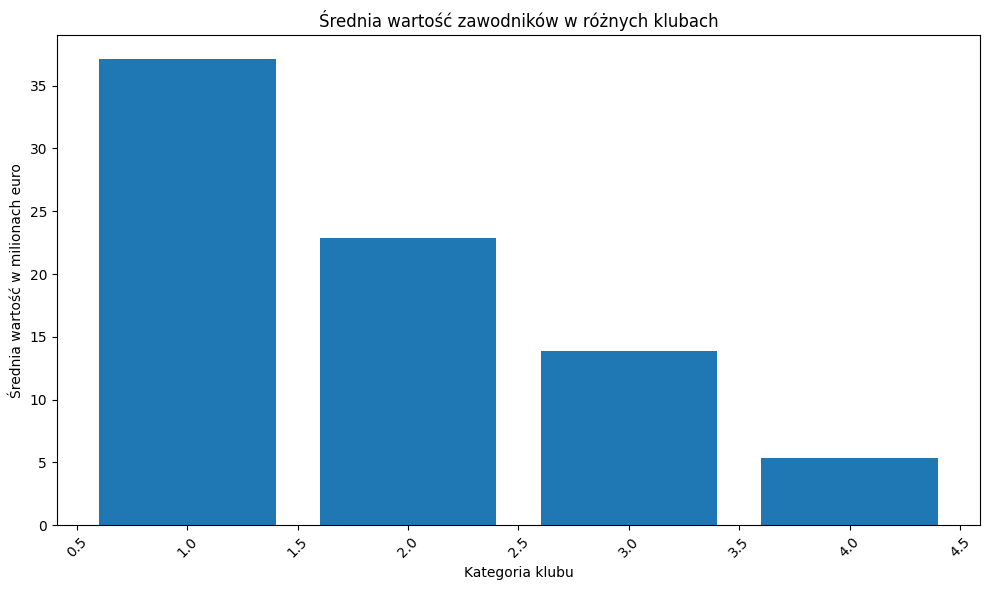

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df_15['Contract Years Left'].value_counts()
filtered_df = df_ML[~df_ML['Contract Years Left'].isin(counts[counts < 5].index)]

# Usuwanie rekordów z błędami w danych 'Contract Years Left'
filtered_df = filtered_df[filtered_df['Contract Years Left'] != 'fail']

# Grupowanie według klubu i obliczanie średniej wartości zawodników
club_avg_value = filtered_df.groupby('Club')['Value'].mean()

# Konwersja wartości na miliony euro i resetowanie indeksu
club_avg_value = club_avg_value.mul(0.000001).reset_index(name='Avg Value in Millions')

# Tworzenie wykresu
plt.figure(figsize=(10,6))
plt.bar(club_avg_value['Club'], club_avg_value['Avg Value in Millions'])
plt.xlabel('Kategoria klubu')
plt.ylabel('Średnia wartość w milionach euro')
plt.title('Średnia wartość zawodników w różnych klubach')
plt.xticks(rotation=45)
plt.tight_layout()  # Poprawia wyświetlanie etykiet osi x w przypadku wielu kategorii
plt.show


Rozkłady prawdopodobieństwa dla wszystkich kolumn

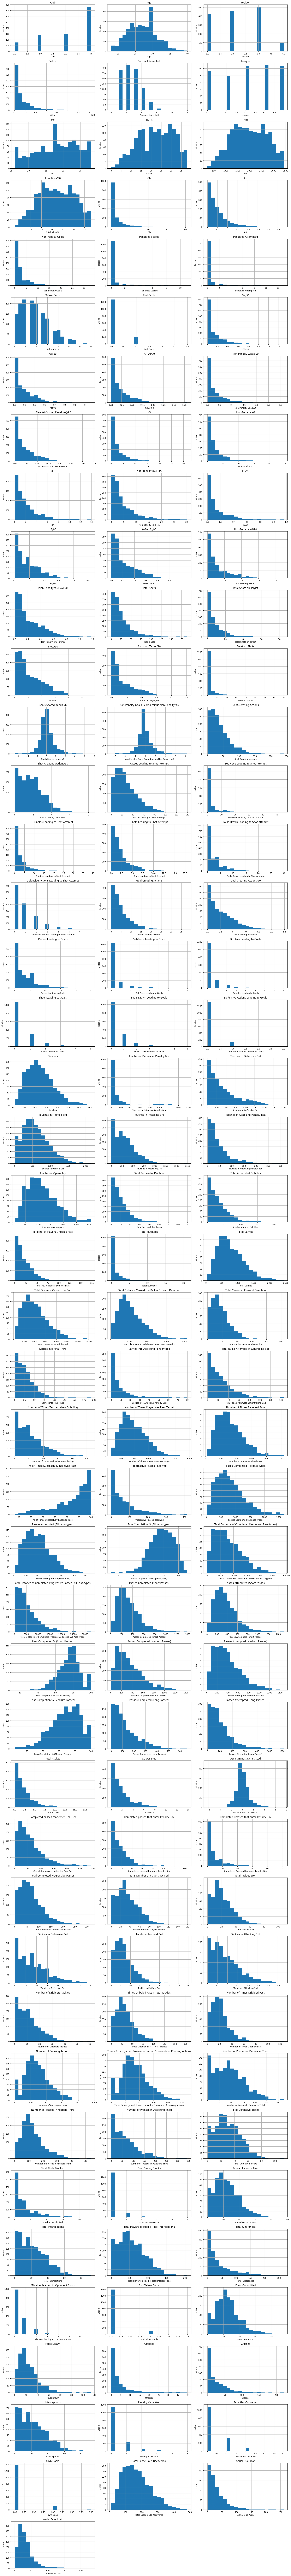

In [126]:

num_columns = len(df_ML.columns)

# Ustawienia siatki wykresów
num_rows = math.ceil(num_columns / 3) 
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 4 * num_rows)) 

# Iteracja przez wszystkie kolumny DataFrame
for i, column in enumerate(df_ML.columns):
    row = i // 3  
    col = i % 3  
    df_ML[column].hist(bins=20, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}')  
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Liczba')


for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout() 
plt.show()  

Podzial przez milion

In [127]:
df_ML['Value'] = df_ML['Value'] / 1_000_000

C:\Users\solsz\AppData\Local\Temp\ipykernel_1648\2919773162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Value'] = df_ML['Value'] / 1_000_000


Podzial datasetu na pozycje

In [128]:
df_attackers = df_ML[df_ML['Position'] == 1]
df_midfielders = df_ML[df_ML['Position'] == 2]
df_defenders = df_ML[df_ML['Position'] == 3]
df_goalkeepers = df_ML[df_ML['Position'] == 4]

In [129]:
print(f"attackers {len(df_attackers)}")
print(f"midfielders {len(df_midfielders)}")
print(f"defenders {len(df_defenders)}")

      

attackers 423
midfielders 456
defenders 505


In [130]:
df_ML.columns.to_list()

['Club',
 'Age',
 'Position',
 'Value',
 'Contract Years Left',
 'League',
 'MP',
 'Starts',
 'Min',
 'Total Mins/90',
 'Gls',
 'Ast',
 'Non-Penalty Goals',
 'Penalties Scored',
 'Penalties Attempted',
 'Yellow Cards',
 'Red Cards',
 'Gls/90',
 'Ast/90',
 '(G+A)/90',
 'Non-Penalty Goals/90',
 '(Gls+Ast-Scored Penalties)/90',
 'xG',
 'Non-Penalty xG',
 'xA',
 'Non-penalty xG+ xA',
 'xG/90',
 'xA/90',
 '(xG+xA)/90',
 'Non-Penalty xG/90',
 '(Non-Penalty xG+xA)/90',
 'Total Shots',
 'Total Shots on Target',
 'Shots/90',
 'Shots on Target/90',
 'Freekick Shots',
 'Goals Scored minus xG',
 'Non-Penalty Goals Scored minus Non-Penalty xG',
 'Shot-Creating Actions',
 'Shot-Creating Actions/90',
 'Passes Leading to Shot Attempt',
 'Set-Piece Leading to Shot Attempt',
 'Dribbles Leading to Shot Attempt',
 'Shots Leading to Shot Attempt',
 'Fouls Drawn Leading to Shot Attempt',
 'Defensive Actions Leading to Shot Attempt',
 'Goal Creating Actions',
 'Goal Creating Actions/90',
 'Passes Leading to 

Standaryzacja Danych

In [131]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ML)

PCA

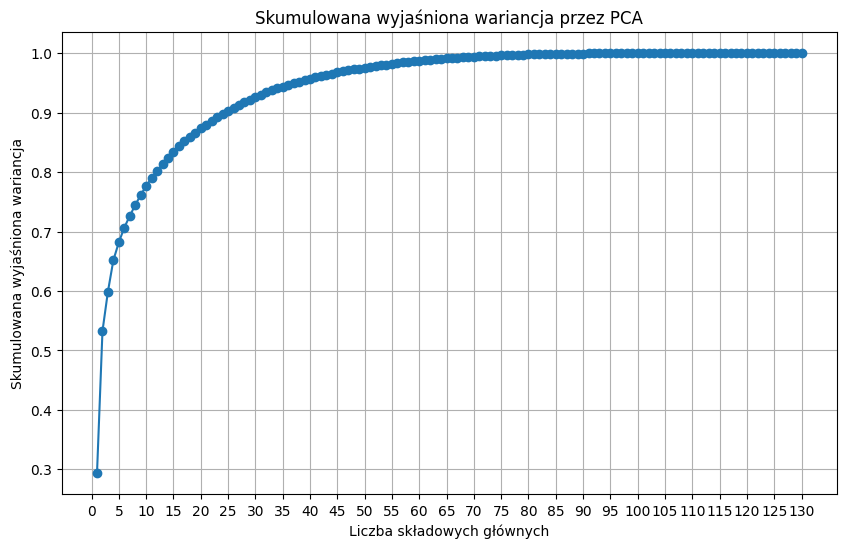

Liczba składowych głównych wyjaśniających 90% wariancji: 25


In [132]:
# Przeprowadzenie PCA
pca = PCA(n_components=None)  
pca.fit(scaled_data)


explained_variance = pca.explained_variance_ratio_.cumsum()


n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.9) + 1


pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.xticks(range(0, len(explained_variance) + 1, 5))
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja przez PCA')
plt.grid(True)
plt.show()

print(f'Liczba składowych głównych wyjaśniających 90% wariancji: {n_components}')

Standaryzacja i PCA dla datasetów dla roznych pozycji

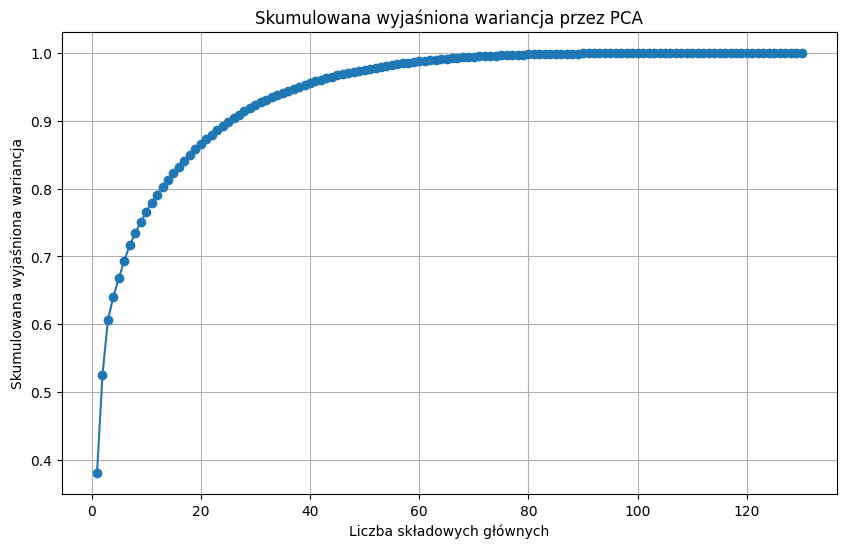

In [133]:
scaler = StandardScaler()

# atakujacy
scaled_attackers = scaler.fit_transform(df_attackers)

# Przeprowadzenie PCA
pca = PCA(n_components=None)  
pca.fit(scaled_attackers)


explained_variance = pca.explained_variance_ratio_.cumsum()


n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.95) + 1


pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_attackers)


pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja przez PCA')
plt.grid(True)
plt.show()

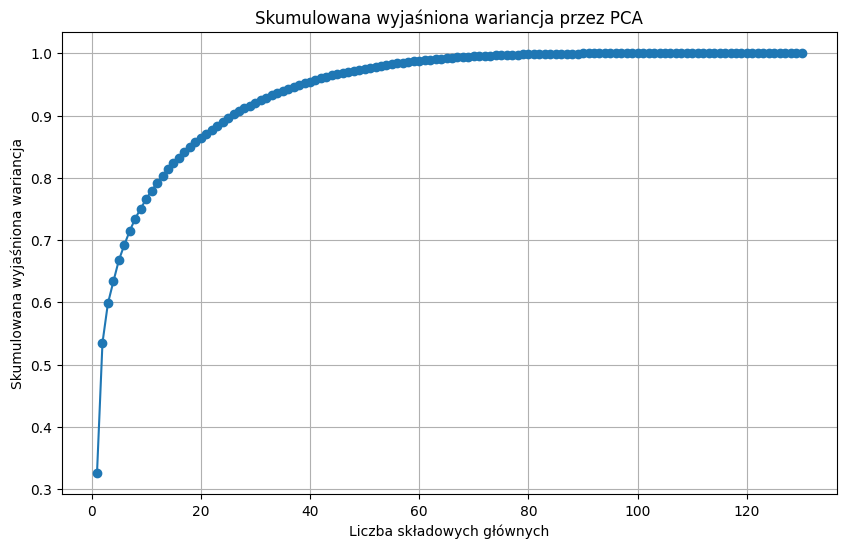

In [134]:
# pomocnicy
scaled_midfielders = scaler.fit_transform(df_midfielders)

# Przeprowadzenie PCA
pca = PCA(n_components=None) 
pca.fit(scaled_midfielders)


explained_variance = pca.explained_variance_ratio_.cumsum()


n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.95) + 1


pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_midfielders)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja przez PCA')
plt.grid(True)
plt.show()

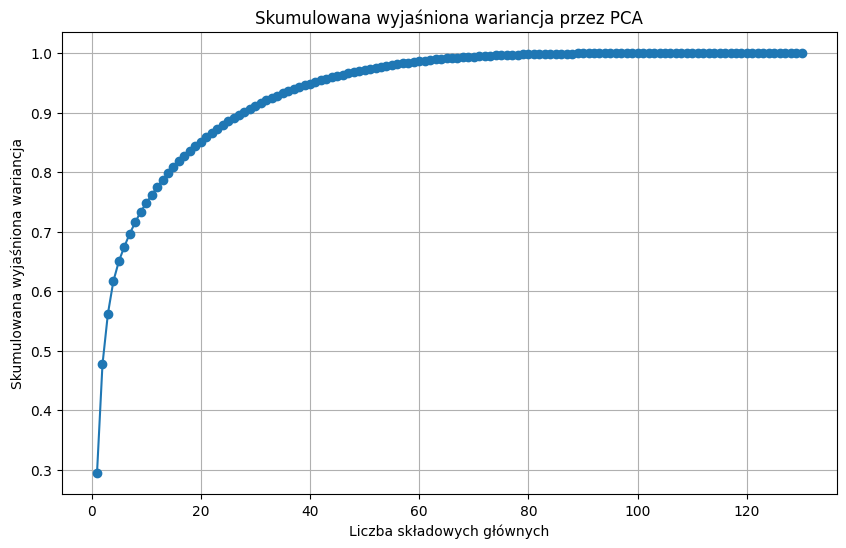

In [135]:
# obroncy
scaled_defenders = scaler.fit_transform(df_defenders)

# Przeprowadzenie PCA
pca = PCA(n_components=None)  
pca.fit(scaled_defenders)


explained_variance = pca.explained_variance_ratio_.cumsum()


n_components = next(x[0] for x in enumerate(explained_variance) if x[1] >= 0.95) + 1


pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_defenders)


pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wyjaśniona wariancja przez PCA')
plt.grid(True)
plt.show()

Znalezienie najwazniejszych cech przy uzyciu SelectKBest

In [136]:


X = df_ML.drop('Value', axis=1)
y = df_ML['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                   )


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     45.92
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.97e-73
Time:                        16:23:35   Log-Likelihood:                -1393.5
No. Observations:                 404   AIC:                             2817.
Df Residuals:                     389   BIC:                             2877.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

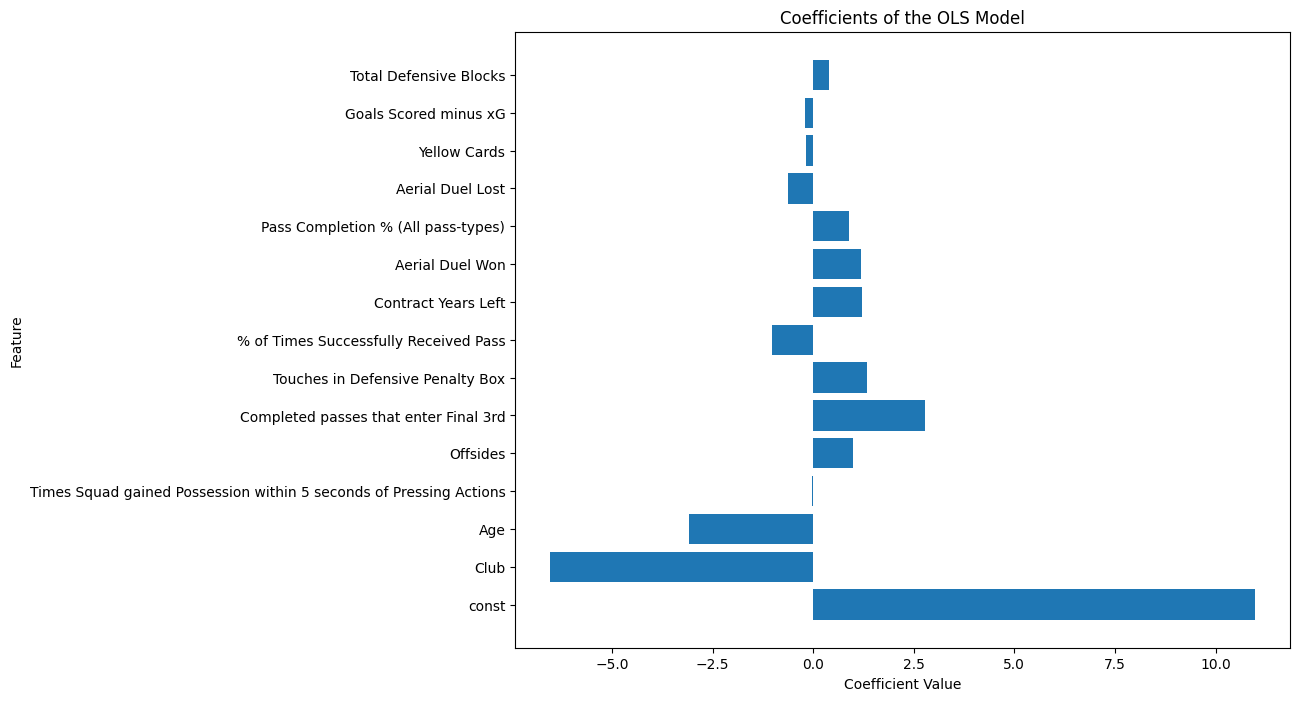

Mean Squared Error on Test Set: 87.60561799956902


In [137]:


X = df_defenders.drop('Value', axis=1)
y = df_defenders['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest jako model bazowy do selekcji cech
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Ważność cech z modelu Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Wybieranie 25 najważniejszych cech
selected_columns_rf = X_train.columns[indices[:25]]

# Przygotowanie danych z wybranymi cechami do obliczenia VIF
X_train_rf = pd.DataFrame(X_train_scaled[:, indices[:25]], columns=selected_columns_rf)

# Obliczanie VIF dla wybranych cech
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_rf.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rf.values, i) for i in range(X_train_rf.shape[1])]

# Usuwanie cech z wysokim VIF (przyjmujemy próg np. VIF > 10)
low_vif_columns = vif_data[vif_data["VIF"] < 10]["Feature"]


X_train_ols_rf = X_train_rf[low_vif_columns]
X_train_ols_rf = sm.add_constant(X_train_ols_rf)  # Dodanie stałej


y_train = y_train.reset_index(drop=True)


ols_model = sm.OLS(y_train, X_train_ols_rf).fit()

print(ols_model.summary())


coefficients = ols_model.params
features = ['const'] + list(low_vif_columns)

plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of the OLS Model')
plt.show()


X_test_rf = pd.DataFrame(X_test_scaled[:, indices[:25]], columns=selected_columns_rf)
X_test_ols_rf = X_test_rf[low_vif_columns]
X_test_ols_rf = sm.add_constant(X_test_ols_rf)
y_pred = ols_model.predict(X_test_ols_rf)

# Obliczenie błędu MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


## WYBRANIE DZIEKI NAJMNIEJSZEJ KORELACJI

#### Metody i importy

In [138]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Funkcja obliczająca maksymalną korelację zmiennej z już wybranymi
def max_corr_with_selected(selected_vars, candidate_var, corr_matrix):
    return corr_matrix.loc[selected_vars, candidate_var].abs().max()

# Główna funkcja wybierająca zmienne
def select_least_correlated_variables(data, num_vars=25):
    # Obliczenie macierzy korelacji
    corr_matrix = data.corr()

    # Lista wybranych zmiennych (początkowo pusta)
    selected_vars = []

    # Iteracyjnie dodajemy zmienne o najmniejszej korelacji z już wybranymi
    while len(selected_vars) < num_vars:
        remaining_vars = [var for var in corr_matrix.columns if var not in selected_vars]
        
        if len(selected_vars) == 0:
            # Pierwsza zmienna: wybieramy losową zmienną (można ją wybrać na podstawie innego kryterium)
            selected_vars.append(remaining_vars[0])
        else:
            # Znajdź zmienną o najmniejszej maksymalnej korelacji z wybranymi
            next_var = min(remaining_vars, key=lambda var: max_corr_with_selected(selected_vars, var, corr_matrix))
            selected_vars.append(next_var)

    return selected_vars

def calculate_vif(data, variables):
    # Tworzenie DataFrame'u tylko z wybranych zmiennych
    df = data[variables]
    
    # Obliczanie VIF dla każdej zmiennej
    vif_data = pd.DataFrame()
    vif_data['variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data

def remove_high_vif_variables(data, variables, threshold=10):
    # Obliczanie VIF dla podanych zmiennych
    vif_data = calculate_vif(data, variables)
    
    # Filtrowanie zmiennych, które mają VIF mniejszy od zadanego progu
    low_vif_variables = vif_data[vif_data['VIF'] < threshold]
    
    return low_vif_variables

## Defenders

In [139]:

X = df_defenders.drop('Value', axis=1)
y = df_defenders['Value']


selected_variables = select_least_correlated_variables(X, num_vars=26)


print(f"Wybrane zmienne {len(selected_variables)}:", selected_variables, )

Wybrane zmienne 26: ['Club', 'Number of Pressing Actions', 'Red Cards', 'Assist minus xG Assisted', 'Penalties Scored', 'Goals Scored minus xG', 'Own Goals', 'Shots Leading to Goals', 'Defensive Actions Leading to Goals', 'Age', 'Position', 'Goal Saving Blocks', 'Penalties Conceded', 'Mistakes leading to Opponent Shots', 'Freekick Shots', 'League', 'Dribbles Leading to Goals', 'xG/90', 'Passes Attempted (Long Passes)', 'Penalty Kicks Won', 'Offsides', 'Yellow Cards', 'Shot-Creating Actions/90', 'Pass Completion % (Short Passes)', 'Defensive Actions Leading to Shot Attempt', 'Total Nutmegs']


In [140]:

variables_with_low_vif = remove_high_vif_variables(df_defenders, selected_variables)
print("Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:")
print(variables_with_low_vif)

Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:
                                     variable       VIF
0                                        Club  1.392554
1                  Number of Pressing Actions  1.564470
2                                   Red Cards  1.137269
3                    Assist minus xG Assisted  1.062436
4                            Penalties Scored  1.108919
5                       Goals Scored minus xG  1.112977
6                                   Own Goals  1.058205
7                      Shots Leading to Goals  1.073769
8          Defensive Actions Leading to Goals  1.258392
9                                         Age  1.138532
11                         Goal Saving Blocks  1.141714
12                         Penalties Conceded  1.100548
13         Mistakes leading to Opponent Shots  1.143149
14                             Freekick Shots  1.303266
15                                     League  1.170966
16                  Dribbles Leading to Goals  1

In [141]:

X = df_defenders[variables_with_low_vif['variable'].tolist()]
Y = df_defenders['Value'] 
X = sm.add_constant(X)  # dodaje stałą do modelu
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



model = sm.OLS(Y_train, X_train).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     24.03
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           4.95e-63
Time:                        16:23:36   Log-Likelihood:                -1398.4
No. Observations:                 404   AIC:                             2849.
Df Residuals:                     378   BIC:                             2953.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [142]:

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE dla modelu na zbiorze testowym:", rmse)

RMSE dla modelu na zbiorze testowym: 9.43459346602452


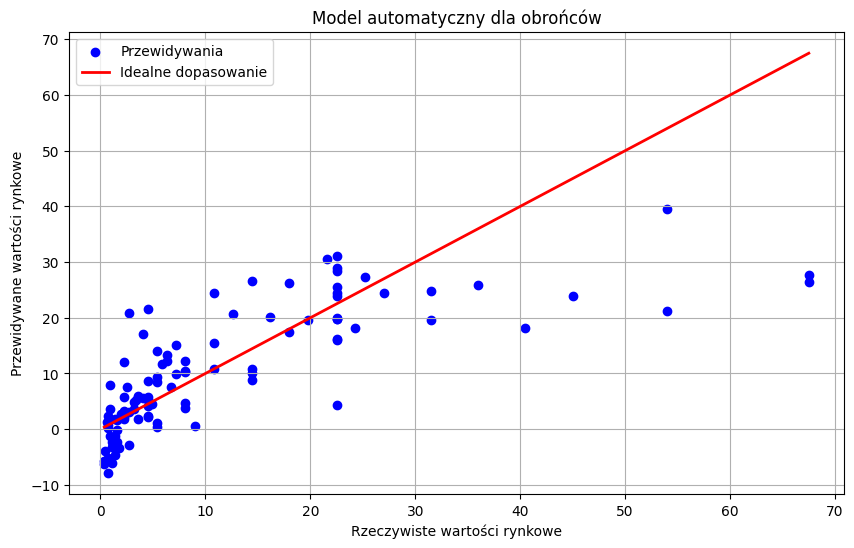

In [143]:
# Tworzenie wykresu - Rzeczywiste wartości vs Przewidywane wartości
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Przewidywania')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title('Model automatyczny dla obrońców')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

## Midfielders

In [144]:

X = df_midfielders.drop('Value', axis=1)
y = df_midfielders['Value']


selected_variables = select_least_correlated_variables(X, num_vars=26)


print(f"Wybrane zmienne {len(selected_variables)}:", selected_variables, )

Wybrane zmienne 26: ['Club', 'Mistakes leading to Opponent Shots', 'Fouls Drawn', 'Assist minus xG Assisted', 'Penalties Conceded', 'League', 'Own Goals', 'Goal Saving Blocks', '2nd Yellow Cards', 'Age', 'Position', 'Non-Penalty Goals Scored minus Non-Penalty xG', 'Non-Penalty xG/90', 'Penalties Scored', 'Defensive Actions Leading to Goals', 'Completed Crosses that enter Penalty Box', 'Aerial Duel Won', 'Passes Completed (Long Passes)', 'Penalty Kicks Won', 'Shots Leading to Goals', 'Set-Piece Leading to Goals', 'Dribbles Leading to Goals', 'Total Nutmegs', 'Pass Completion % (Medium Passes)', 'Yellow Cards', 'Contract Years Left']


In [145]:

variables_with_low_vif = remove_high_vif_variables(df_midfielders, selected_variables)
print("Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:")
print(variables_with_low_vif)

Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:
                                         variable       VIF
0                                            Club  1.435602
1              Mistakes leading to Opponent Shots  1.112838
2                                     Fouls Drawn  1.699749
3                        Assist minus xG Assisted  1.119232
4                              Penalties Conceded  1.123552
5                                          League  1.080160
6                                       Own Goals  1.110440
7                              Goal Saving Blocks  1.071898
8                                2nd Yellow Cards  1.117724
9                                             Age  1.375015
11  Non-Penalty Goals Scored minus Non-Penalty xG  1.129798
12                              Non-Penalty xG/90  1.757109
13                               Penalties Scored  1.187720
14             Defensive Actions Leading to Goals  1.135581
15       Completed Crosses that enter Penalt

In [146]:

X = df_midfielders[variables_with_low_vif['variable'].tolist()]
Y = df_midfielders['Value'] 
X = sm.add_constant(X)  # dodaje stałą do modelu

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model1 = sm.OLS(Y_train, X_train).fit()


print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     23.75
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           9.99e-60
Time:                        16:23:37   Log-Likelihood:                -1331.2
No. Observations:                 364   AIC:                             2714.
Df Residuals:                     338   BIC:                             2816.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [147]:

Y_pred = model1.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE dla modelu na zbiorze testowym:", rmse)

RMSE dla modelu na zbiorze testowym: 10.473375323593292


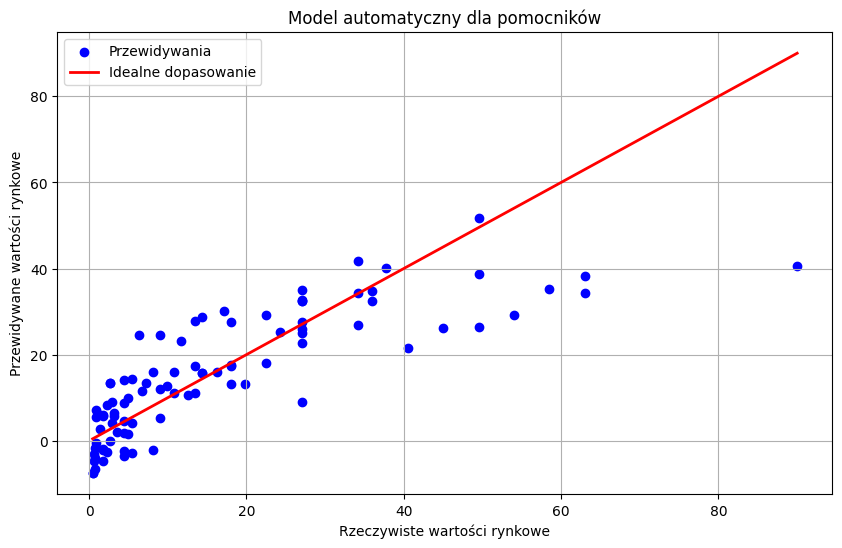

In [148]:

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Przewidywania')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title('Model automatyczny dla pomocników')
plt.legend()
plt.grid(True)


plt.show()

## Attackers

In [149]:

X = df_attackers.drop('Value', axis=1)
y = df_attackers['Value']


selected_variables = select_least_correlated_variables(X, num_vars=26)


print(f"Wybrane zmienne {len(selected_variables)}:", selected_variables, )

Wybrane zmienne 26: ['Club', 'Red Cards', 'Touches in Defensive 3rd', 'Age', 'Position', 'Goal Saving Blocks', 'Assist minus xG Assisted', 'Own Goals', 'League', 'Goals Scored minus xG', 'Fouls Drawn Leading to Goals', 'Mistakes leading to Opponent Shots', 'Penalties Conceded', 'Defensive Actions Leading to Goals', 'Aerial Duel Lost', 'Yellow Cards', 'Total Nutmegs', 'Shots Leading to Goals', 'Shots/90', 'Tackles in Attacking 3rd', 'Set-Piece Leading to Goals', 'xA/90', 'Pass Completion % (All pass-types)', 'Penalties Scored', 'Dribbles Leading to Goals', 'Fouls Drawn']


In [150]:

variables_with_low_vif = remove_high_vif_variables(df_attackers, selected_variables)
print("Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:")
print(variables_with_low_vif)

Wybrane zmienne z VIF poniżej 10 oraz ich wartości VIF:
                              variable       VIF
0                                 Club  1.493509
1                            Red Cards  1.082439
2             Touches in Defensive 3rd  1.794381
3                                  Age  1.150032
5                   Goal Saving Blocks  1.102721
6             Assist minus xG Assisted  1.117615
7                            Own Goals  1.067371
8                               League  1.086941
9                Goals Scored minus xG  1.127139
10        Fouls Drawn Leading to Goals  1.481609
11  Mistakes leading to Opponent Shots  1.077161
12                  Penalties Conceded  1.080073
13  Defensive Actions Leading to Goals  1.162898
14                    Aerial Duel Lost  1.945828
15                        Yellow Cards  1.250119
16                       Total Nutmegs  1.405922
17              Shots Leading to Goals  1.364413
18                            Shots/90  1.545272
19           

In [151]:

X = df_attackers[variables_with_low_vif['variable'].tolist()]
Y = df_attackers['Value'] 
X = sm.add_constant(X)  # dodaje stałą do modelu

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model2 = sm.OLS(Y_train, X_train).fit()


print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     23.54
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.27e-57
Time:                        16:23:37   Log-Likelihood:                -1291.3
No. Observations:                 338   AIC:                             2635.
Df Residuals:                     312   BIC:                             2734.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [152]:

Y_pred = model2.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE dla modelu na zbiorze testowym:", rmse)

RMSE dla modelu na zbiorze testowym: 13.711320770181041


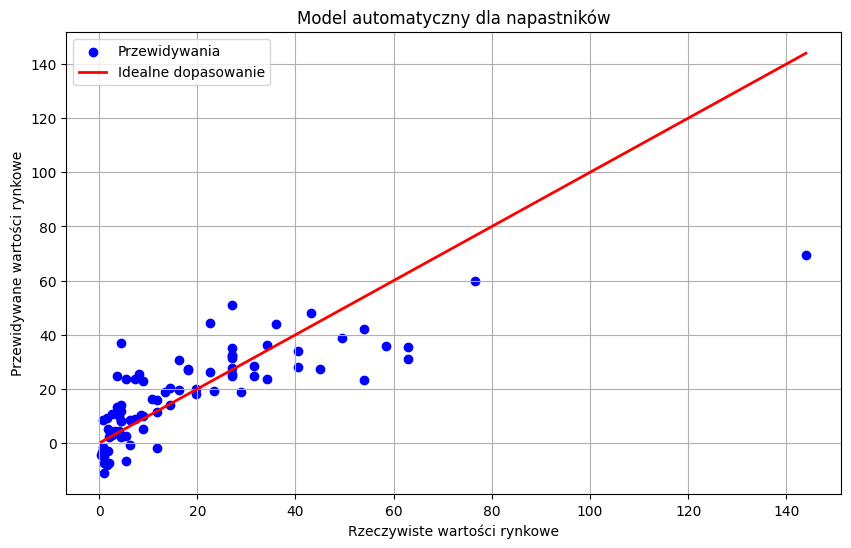

In [153]:

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Przewidywania')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Idealne dopasowanie')
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title('Model automatyczny dla napastników')
plt.legend()
plt.grid(True)


plt.show()

## STARE AUTOMATYCZNE MODELE

DEFENDERS

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.520126010149397, tolerance: 5.331643565015479
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.558513757556284, tolerance: 5.331643565015479
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.285080755485978, tolerance: 5.331643565015479
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. Yo

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     32.72
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           6.05e-79
Time:                        16:23:56   Log-Likelihood:                -1357.9
No. Observations:                 404   AIC:                             2768.
Df Residuals:                     378   BIC:                             2872.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

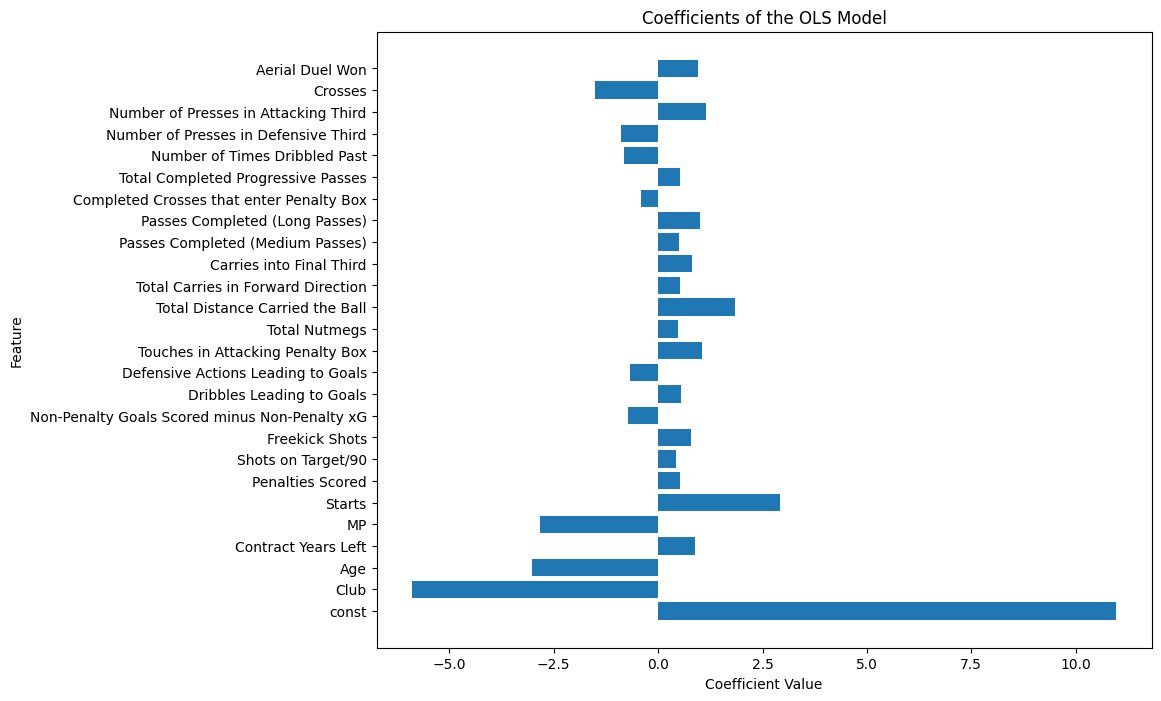

Mean Squared Error on Test Set: 85.7997606415744


In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = df_defenders.drop('Value', axis=1)
y = df_defenders['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)


selector = RFE(estimator=elastic_net, n_features_to_select=25, step=1)
selector.fit(X_train_scaled, y_train)


selected_columns = X_train.columns[selector.support_]


X_train_selected = pd.DataFrame(X_train_scaled[:, selector.support_], columns=selected_columns)
X_train_selected = sm.add_constant(X_train_selected) 

y_train = y_train.reset_index(drop=True)


ols_model = sm.OLS(y_train, X_train_selected).fit()


print(ols_model.summary())


coefficients = ols_model.params
features = ['const'] + list(selected_columns)

plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of the OLS Model')
plt.show()


X_test_selected = pd.DataFrame(X_test_scaled[:, selector.support_], columns=selected_columns)
X_test_selected = sm.add_constant(X_test_selected)
y_pred = ols_model.predict(X_test_selected)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


In [155]:

correlation_matrix = df_defenders[selected_columns].corr()

correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i, j]) > 0.6: 
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Completed Crosses that enter Penalty Box - Crosses: 0.94
Total Distance Carried the Ball - Passes Completed (Medium Passes): 0.91
MP - Starts: 0.90
Total Carries in Forward Direction - Carries into Final Third: 0.85
Passes Completed (Medium Passes) - Passes Completed (Long Passes): 0.84
Total Carries in Forward Direction - Total Completed Progressive Passes: 0.79
Number of Presses in Attacking Third - Crosses: 0.79
Total Distance Carried the Ball - Passes Completed (Long Passes): 0.75
Carries into Final Third - Number of Presses in Attacking Third: 0.74
Completed Crosses that enter Penalty Box - Number of Presses in Attacking Third: 0.74
Total Distance Carried the Ball - Total Carries in Forward Direction: 0.73
Carries into Final Third - Crosses: 0.72
Starts - Total Distance Carried the Ball: 0.71
Starts - Passes Completed (Medium Passes): 0.70
Total Distance Carried the Ball - Total Completed Progressive Passes: 0.69
Carries into Final Third - Completed Crosses that enter Penalty Box:

                                              Feature       Score
0                                                Club  331.890585
8                                       Total Carries  166.024569
12             Number of Times Player was Pass Target  165.323887
13                      Number of Times Received Pass  165.322899
14                  Passes Completed (All pass-types)  152.302113
9                     Total Distance Carried the Ball  144.336206
21                   Passes Completed (Medium Passes)  130.657633
10  Total Distance Carried the Ball in Forward Dir...  129.719722
15                  Passes Attempted (All pass-types)  129.594091
5                             Touches in Midfield 3rd  128.756461
22                   Passes Attempted (Medium Passes)  126.358176
7                                Touches in Open-play  125.502189
17  Total Distance of Completed Passes (All Pass-t...  115.014027
4                                             Touches  113.993122
19        

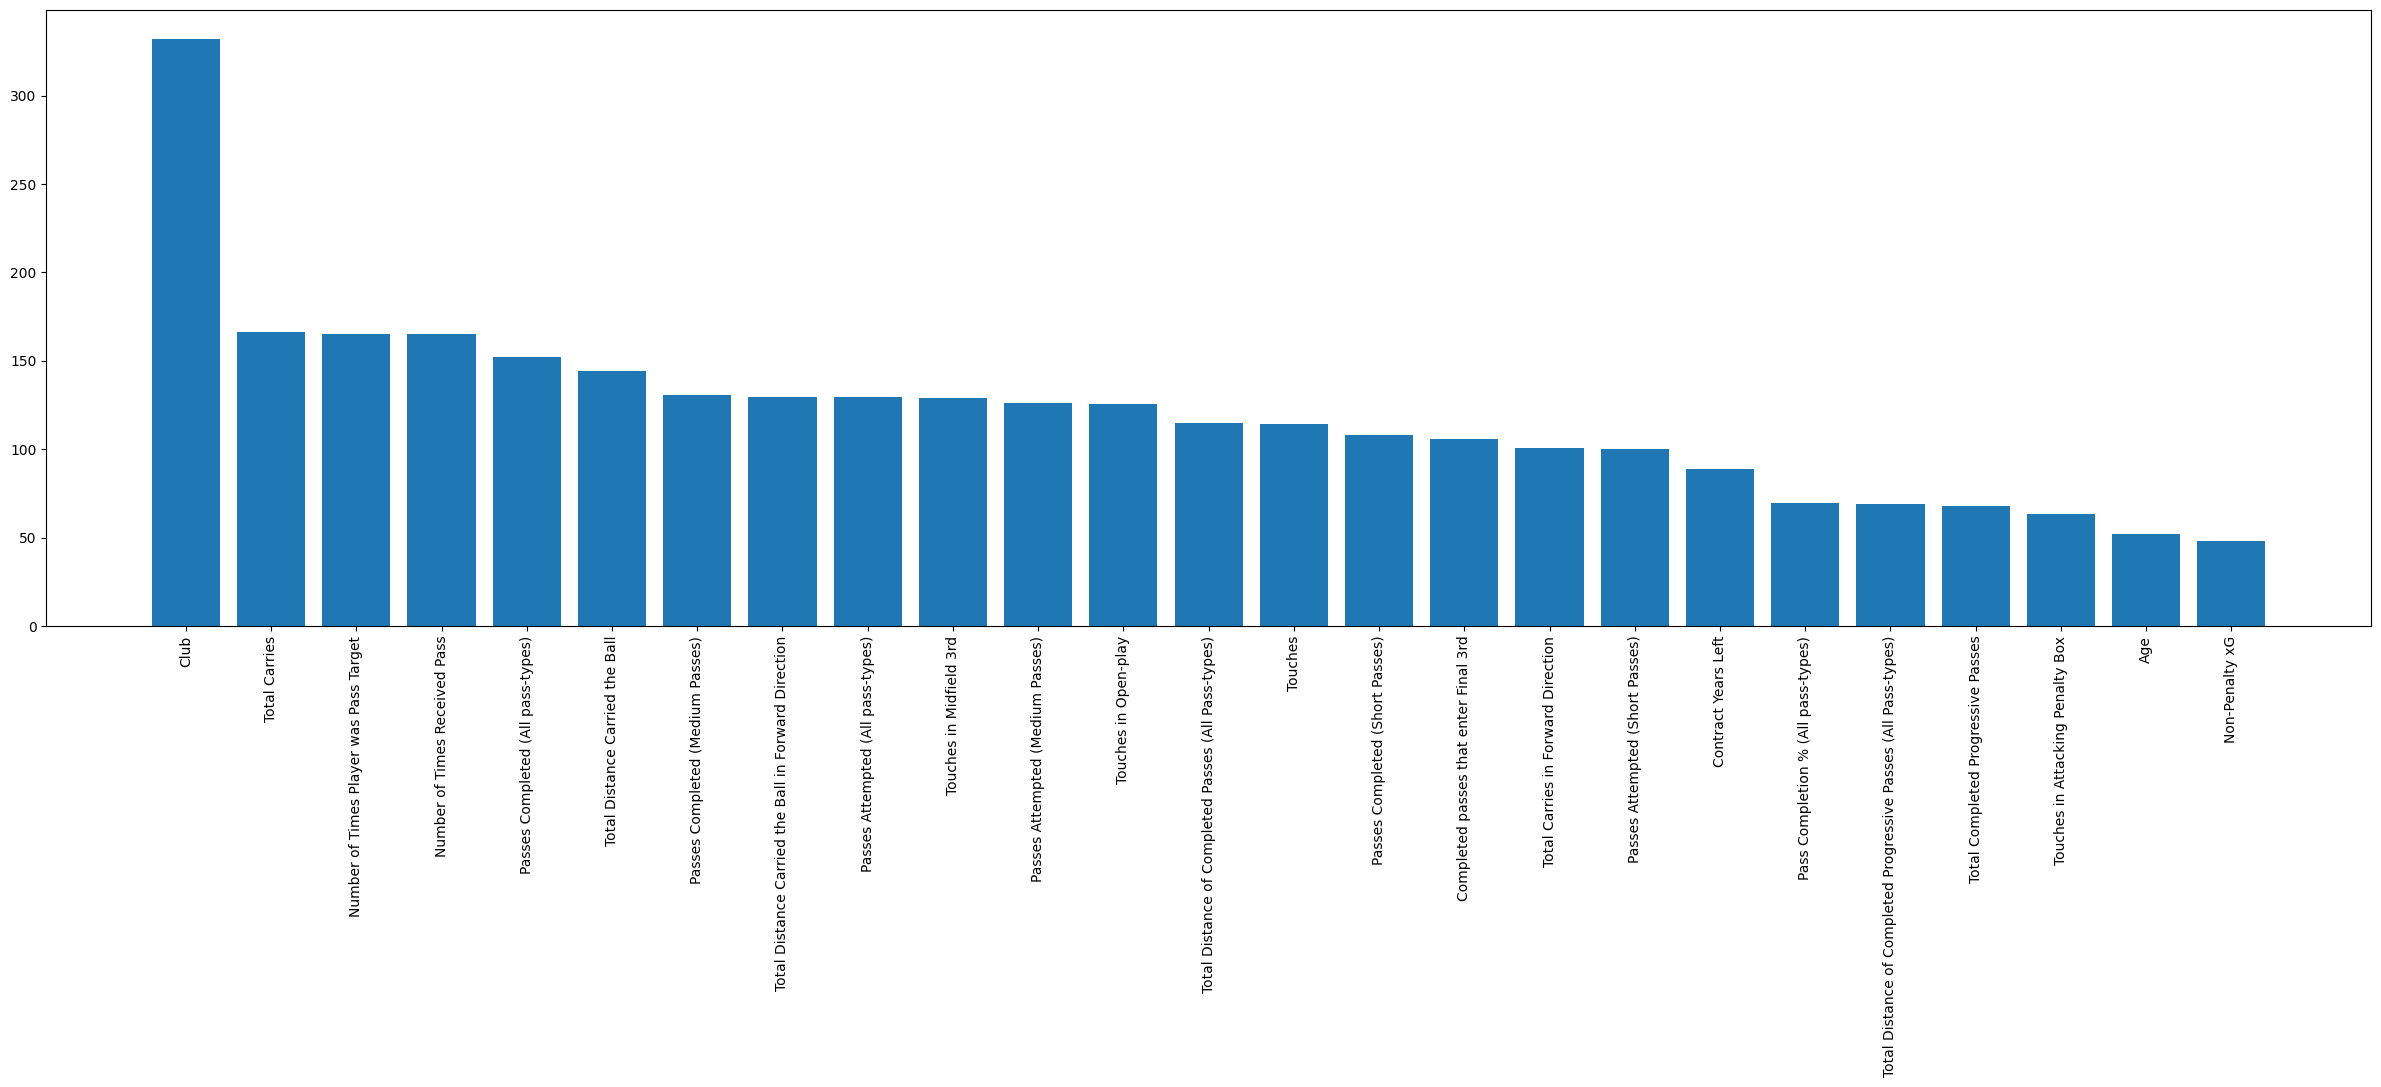

In [156]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm


X = df_defenders.drop('Value', axis=1)
y = df_defenders['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20,
                                                   )

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


fs = SelectKBest(score_func=f_regression, k=25)
X_train_fs = fs.fit_transform(X_train_scaled, y_train)
X_test_fs = fs.transform(X_test_scaled)


selected_indices = fs.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
feature_scores = fs.scores_[selected_indices]


feature_importances = pd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores})


feature_importances = feature_importances.sort_values(by='Score', ascending=False)


print(feature_importances)


plt.figure(figsize=(30, 8))
plt.bar(feature_importances['Feature'], feature_importances['Score'])
plt.xticks(rotation='vertical')
plt.show()


In [157]:


correlation_matrix = df_defenders[feature_importances['Feature']].corr()


correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.6: 
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Passes Completed (Short Passes) - Passes Attempted (Short Passes): 1.00
Number of Times Player was Pass Target - Number of Times Received Pass: 1.00
Passes Attempted (All pass-types) - Touches: 0.99
Number of Times Received Pass - Passes Completed (All pass-types): 0.99
Passes Completed (Medium Passes) - Passes Attempted (Medium Passes): 0.99
Total Carries - Number of Times Received Pass: 0.99
Total Carries - Number of Times Player was Pass Target: 0.99
Total Carries - Passes Completed (All pass-types): 0.99
Number of Times Player was Pass Target - Passes Completed (All pass-types): 0.99
Touches in Open-play - Touches: 0.99
Passes Completed (All pass-types) - Passes Attempted (All pass-types): 0.99
Number of Times Player was Pass Target - Passes Attempted (All pass-types): 0.98
Passes Completed (Medium Passes) - Total Distance of Completed Passes (All Pass-types): 0.98
Passes Completed (All pass-types) - Touches in Open-play: 0.98
Total Carries - Passes Attempted (All pass-types): 0.98

In [158]:
from sklearn.feature_selection import SelectKBest, f_regression



X = df_defenders.drop('Value', axis=1)
y = df_defenders['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


fs = SelectKBest(score_func=f_regression, k=50)
X_train_fs = fs.fit_transform(X_train_scaled, y_train)
X_test_fs = fs.transform(X_test_scaled)


selected_indices = fs.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]


correlation_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).loc[:, selected_feature_names].corr()


correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:  
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


to_remove = set()
for pair in correlated_pairs:
    if len(to_remove) < 25:
        to_remove.add(pair[0])


final_features = [feat for feat in selected_feature_names if feat not in to_remove]


X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)[final_features]
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)[final_features]


X_train_final = sm.add_constant(X_train_final.reset_index(drop=True))
y_train = y_train.reset_index(drop=True)
X_test_final = sm.add_constant(X_test_final.reset_index(drop=True))


model = sm.OLS(y_train, X_train_final)
results = model.fit()


print(results.summary())


y_pred = results.predict(X_test_final)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     28.41
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.92e-71
Time:                        16:23:57   Log-Likelihood:                -1376.9
No. Observations:                 404   AIC:                             2806.
Df Residuals:                     378   BIC:                             2910.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [159]:


X_train_fs_df = pd.DataFrame(X_train_fs, columns=selected_feature_names)
X_test_fs_df = pd.DataFrame(X_test_fs, columns=selected_feature_names)

y_train = y_train.reset_index(drop=True)
X_train_fs_df = X_train_fs_df.reset_index(drop=True)


X_train_ols = sm.add_constant(X_train_fs_df) 
model_ols = sm.OLS(y_train, X_train_ols)
results_ols = model_ols.fit()


print(results_ols.summary())




                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     15.40
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.65e-62
Time:                        16:23:57   Log-Likelihood:                -1356.8
No. Observations:                 404   AIC:                             2816.
Df Residuals:                     353   BIC:                             3020.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [160]:
from sklearn.metrics import mean_squared_error
y_train_pred = results_ols.predict(X_train_ols)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE: {rmse:.4f}')


RMSE: 6.9544


VIF

In [161]:

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_ols.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_ols.values, i) for i in range(X_train_ols.shape[1])]

print("\nVIF values:")
print(vif_data)


VIF values:
                                              Feature           VIF
0                                               const      1.000000
1                                                Club      2.103347
2                                                 Age      1.790336
3                                 Contract Years Left      1.596741
4                                              Starts     64.280233
5                                                 Min  72124.072475
6                                       Total Mins/90  72269.019963
7                                                  xG     50.729281
8                                      Non-Penalty xG    431.821398
9                                  Non-penalty xG+ xA   1617.882734
10                                  Non-Penalty xG/90     31.363229
11                             (Non-Penalty xG+xA)/90     28.762761
12                                        Total Shots     38.555028
13                              Tot

MIDFIELDERS

                                              Feature       Score
0                                                Club  254.413803
6                      Passes Leading to Shot Attempt  144.520605
17             Number of Times Player was Pass Target  136.455753
15                 Total Carries in Forward Direction  131.912277
10                           Touches in Attacking 3rd  129.321876
18                      Number of Times Received Pass  125.845231
12                                      Total Carries  122.874553
8                             Passes Leading to Goals  120.027571
14  Total Distance Carried the Ball in Forward Dir...  117.669294
5                               Shot-Creating Actions  115.193063
13                    Total Distance Carried the Ball  112.765847
7                               Goal Creating Actions  110.500100
22                    Passes Attempted (Short Passes)  105.725634
21                    Passes Completed (Short Passes)  103.977046
9         

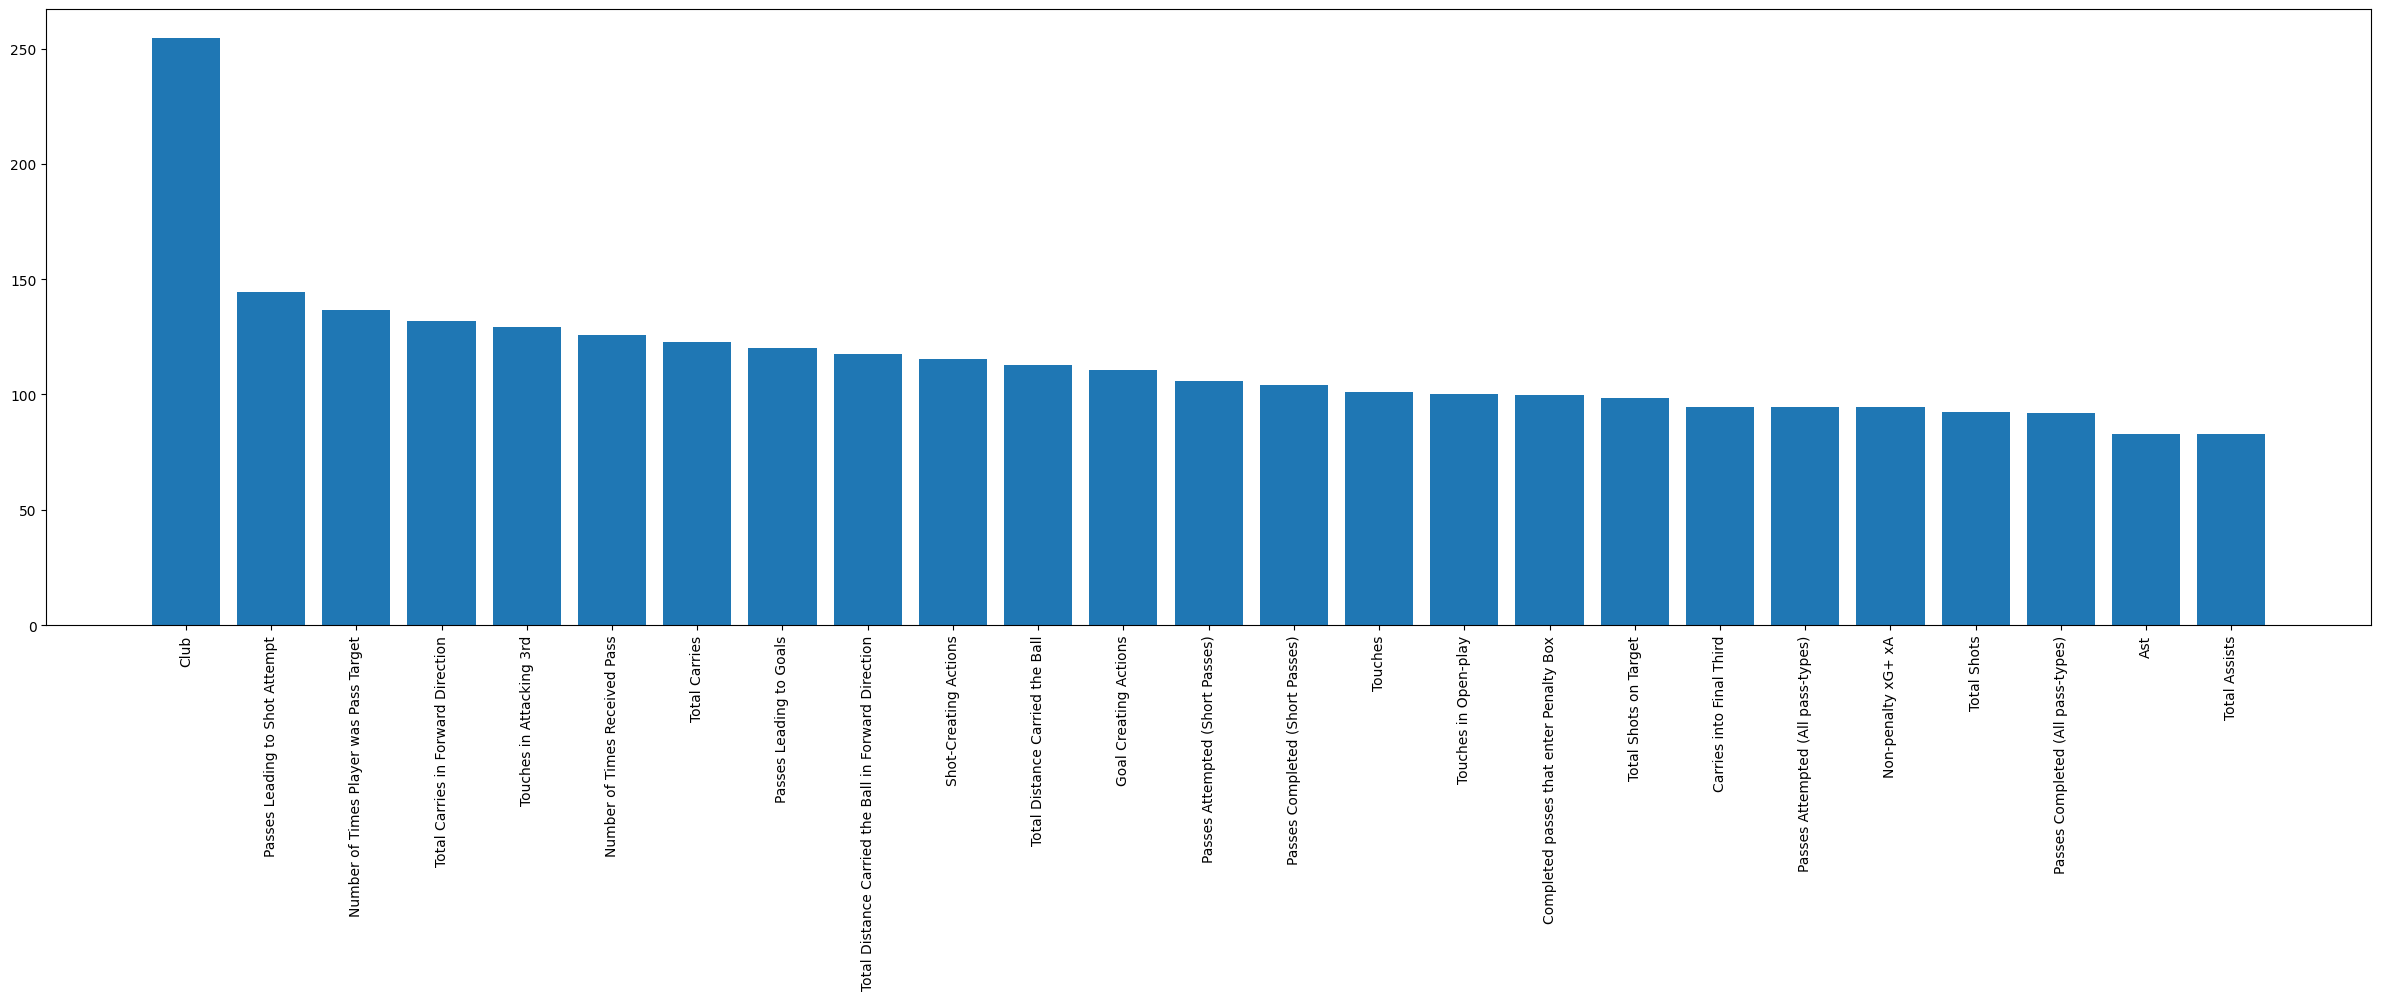

In [162]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm


X = df_midfielders.drop('Value', axis=1)
y = df_midfielders['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20,
                                                   )

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


fs = SelectKBest(score_func=f_regression, k=25)
X_train_fs = fs.fit_transform(X_train_scaled, y_train)
X_test_fs = fs.transform(X_test_scaled)


selected_indices = fs.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
feature_scores = fs.scores_[selected_indices]


feature_importances = pd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores})


feature_importances = feature_importances.sort_values(by='Score', ascending=False)


print(feature_importances)


plt.figure(figsize=(30, 8))
plt.bar(feature_importances['Feature'], feature_importances['Score'])
plt.xticks(rotation='vertical')
plt.show()


In [163]:
X_train_fs_df = pd.DataFrame(X_train_fs, columns=selected_feature_names)
X_test_fs_df = pd.DataFrame(X_test_fs, columns=selected_feature_names)

y_train = y_train.reset_index(drop=True)
X_train_fs_df = X_train_fs_df.reset_index(drop=True)

# Tworzenie modelu OLS
X_train_ols = sm.add_constant(X_train_fs_df)  # dodanie kolumny z wartością stałą
model_ols = sm.OLS(y_train, X_train_ols)
results_ols = model_ols.fit()

# Wyświetlenie podsumowania modelu
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     24.44
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           9.51e-60
Time:                        16:23:57   Log-Likelihood:                -1332.3
No. Observations:                 364   AIC:                             2715.
Df Residuals:                     339   BIC:                             2812.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [164]:
from sklearn.metrics import mean_squared_error
y_train_pred = results_ols.predict(X_train_ols)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE: {rmse:.4f}')


RMSE: 9.4052


ATTACKERS

                                   Feature       Score
0                                     Club  274.098633
6                       Non-penalty xG+ xA  211.030809
14        Touches in Attacking Penalty Box  209.890945
17      Carries into Attacking Penalty Box  196.014065
13                Touches in Attacking 3rd  188.306675
11                   Goal Creating Actions  179.904354
12                 Passes Leading to Goals  162.043582
9                    Shot-Creating Actions  162.021073
10          Passes Leading to Shot Attempt  159.624311
20             Progressive Passes Received  152.274144
7                              Total Shots  146.803809
4                           Non-Penalty xG  140.645905
19           Number of Times Received Pass  139.050556
21         Passes Completed (Short Passes)  138.401646
8                    Total Shots on Target  133.450640
22         Passes Attempted (Short Passes)  133.015185
16      Total Carries in Forward Direction  132.227341
3         

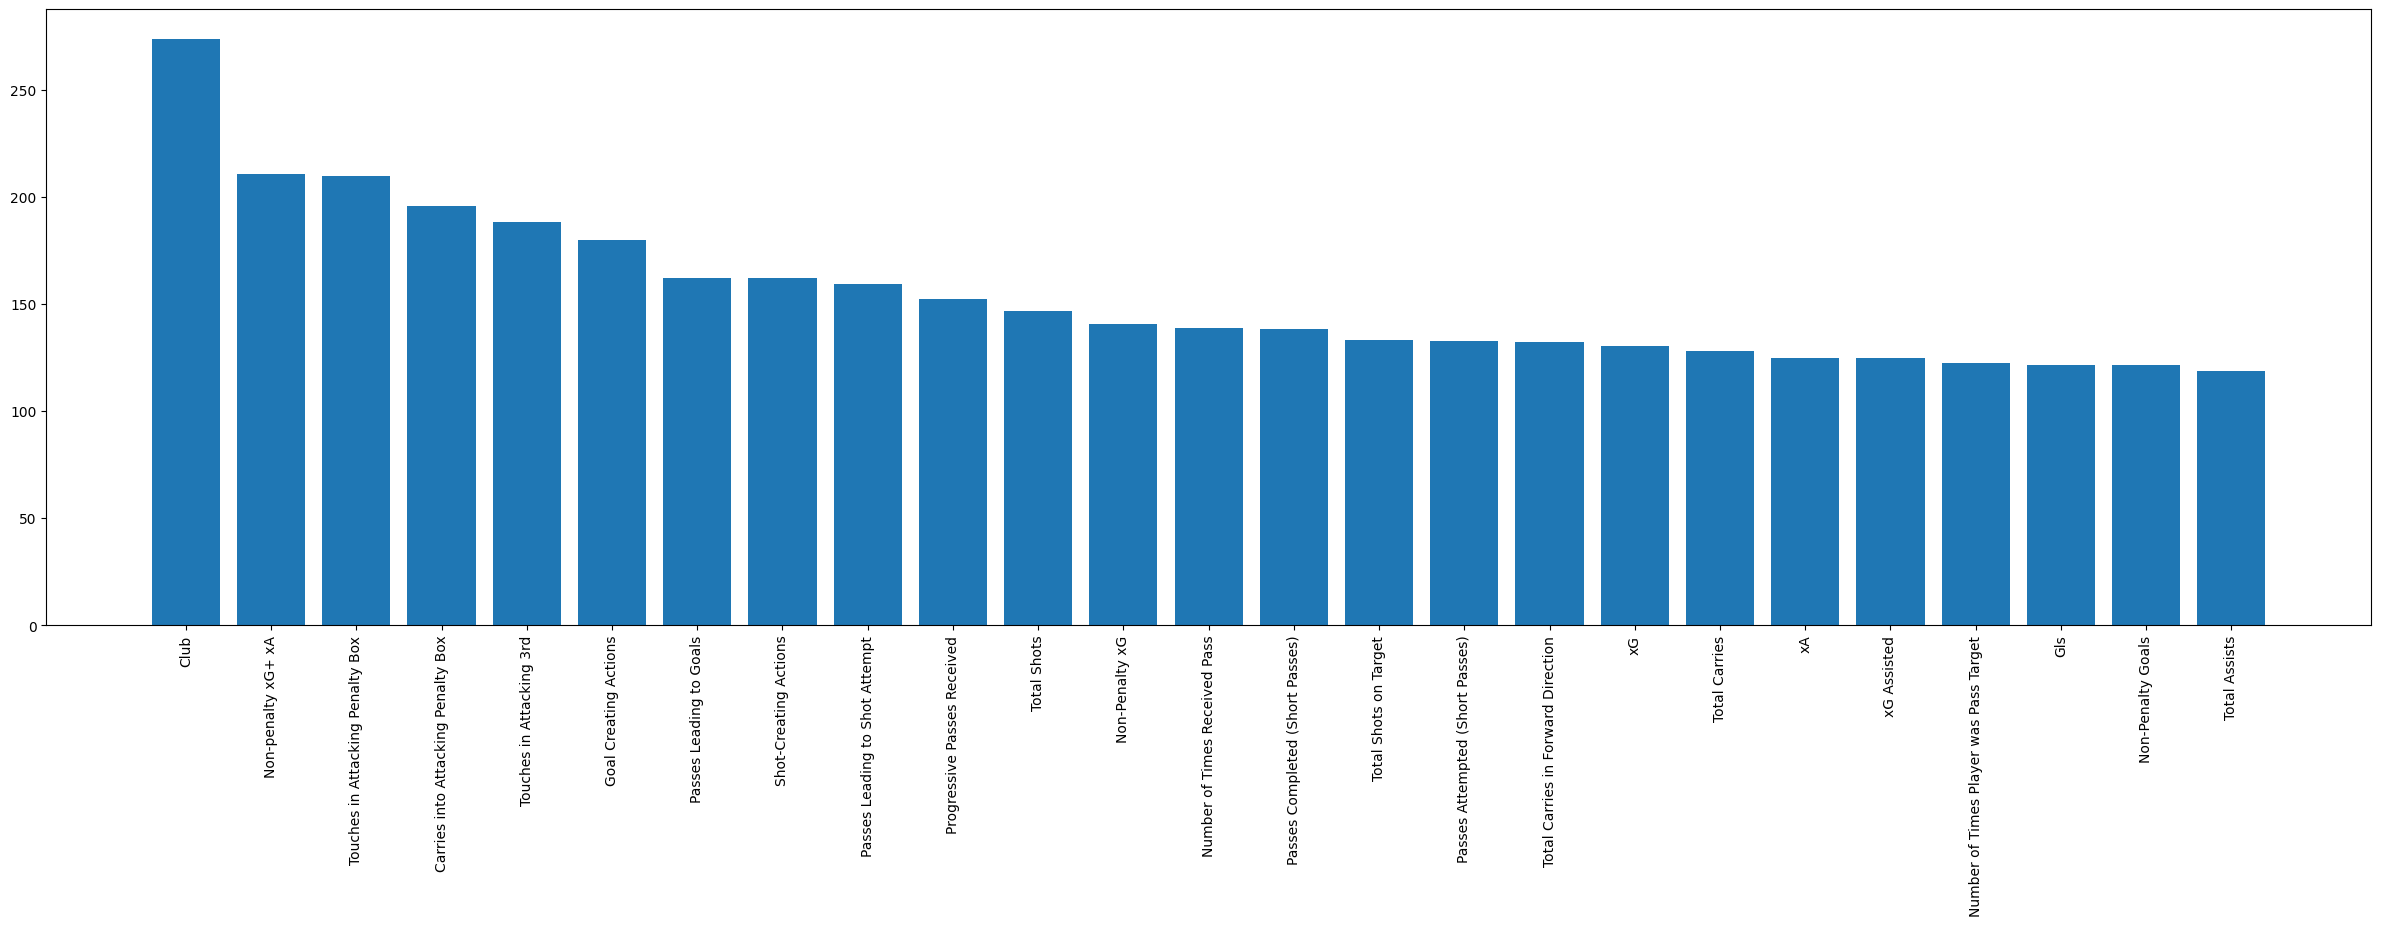

In [165]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm


X = df_attackers.drop('Value', axis=1)
y = df_attackers['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20,
                                                   )

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


fs = SelectKBest(score_func=f_regression, k=25)
X_train_fs = fs.fit_transform(X_train_scaled, y_train)
X_test_fs = fs.transform(X_test_scaled)


selected_indices = fs.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
feature_scores = fs.scores_[selected_indices]


feature_importances = pd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores})


feature_importances = feature_importances.sort_values(by='Score', ascending=False)


print(feature_importances)


plt.figure(figsize=(30, 8))
plt.bar(feature_importances['Feature'], feature_importances['Score'])
plt.xticks(rotation='vertical')
plt.show()


In [166]:
X_train_fs_df = pd.DataFrame(X_train_fs, columns=selected_feature_names)
X_test_fs_df = pd.DataFrame(X_test_fs, columns=selected_feature_names)

y_train = y_train.reset_index(drop=True)
X_train_fs_df = X_train_fs_df.reset_index(drop=True)


X_train_ols = sm.add_constant(X_train_fs_df) 
model_ols = sm.OLS(y_train, X_train_ols)
results_ols = model_ols.fit()

print(results_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     24.95
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.13e-58
Time:                        16:23:58   Log-Likelihood:                -1307.0
No. Observations:                 338   AIC:                             2664.
Df Residuals:                     313   BIC:                             2760.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [167]:
from sklearn.metrics import mean_squared_error
y_train_pred = results_ols.predict(X_train_ols)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE: {rmse:.4f}')


RMSE: 11.5645


Sprawdzanie feature importance

# MANUALNE MODELE

In [168]:
common_selected_columns = ['Club', 'Age', 'Contract Years Left', 'League', 'Starts', 'Pass Completion % (All pass-types)']

DEFENDERS

In [169]:
selected_columns = common_selected_columns + ['Gls','Crosses', 'Shot-Creating Actions/90', 'Defensive Actions Leading to Shot Attempt', 'Total Distance Carried the Ball in Forward Direction', 'Number of Pressing Actions',  'Total Interceptions', 'Total Clearances', 'Fouls Committed', 'Aerial Duel Won', 'Yellow Cards', 'Red Cards', 'Passes Attempted (Long Passes)', 'Mistakes leading to Opponent Shots', 'Total Successful Dribbles', 'Own Goals', 'Total Failed Attempts at Controlling Ball', 'Total Loose Balls Recovered', 'Penalties Conceded']
print(len(selected_columns))

25


Korelacje sprawdzanie

In [170]:

correlation_matrix = df_defenders[selected_columns].corr()

correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i, j]) > 0.6:  
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Starts - Total Loose Balls Recovered: 0.87
Total Clearances - Aerial Duel Won: 0.85
Passes Attempted (Long Passes) - Total Loose Balls Recovered: 0.79
Crosses - Shot-Creating Actions/90: 0.77
Total Successful Dribbles - Total Failed Attempts at Controlling Ball: 0.75
Starts - Passes Attempted (Long Passes): 0.72
Crosses - Total Failed Attempts at Controlling Ball: 0.71
Total Interceptions - Total Loose Balls Recovered: 0.70
Aerial Duel Won - Total Loose Balls Recovered: 0.69
Total Clearances - Total Loose Balls Recovered: 0.68
Starts - Total Interceptions: 0.68
Total Distance Carried the Ball in Forward Direction - Passes Attempted (Long Passes): 0.67
Total Distance Carried the Ball in Forward Direction - Total Loose Balls Recovered: 0.67
Total Clearances - Passes Attempted (Long Passes): 0.67
Starts - Total Distance Carried the Ball in Forward Direction: 0.66
Number of Pressing Actions - Fouls Committed: 0.64
Starts - Number of Pressing Actions: 0.63
Starts - Total Clearances: 0.62


In [171]:
X = df_defenders[selected_columns]
y = df_defenders['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, random_state=42 
                                                   )

X_train_with_const = sm.add_constant(X_train) 


model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
print(len(selected_columns))
print(results.summary())


vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print(vif_data)

X_test_with_const = sm.add_constant(X_test) 
y_pred = results.predict(X_test_with_const)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print(f"\nRMSE: {rmse:.2f}")


25
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     28.10
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.30e-71
Time:                        16:23:58   Log-Likelihood:                -1378.4
No. Observations:                 404   AIC:                             2809.
Df Residuals:                     378   BIC:                             2913.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


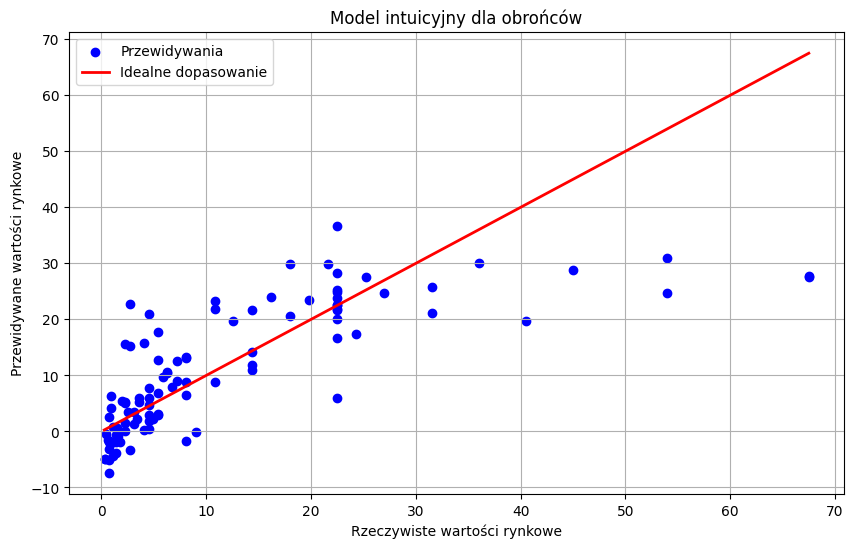

In [172]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Przewidywania' )
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', lw=2, label='Idealne dopasowanie')  
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title(f'Model intuicyjny dla obrońców')
plt.legend()
plt.grid(True)
plt.show()

PRZESKALOWANE

In [173]:
print(len(selected_columns))
# Wybór danych
X = df_defenders[selected_columns]
y = df_defenders['Value'] 

# Podział na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Resetowanie indeksów
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Inicjalizacja i dopasowanie StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konwersja przeskalowanych danych z powrotem do DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Dodanie kolumny stałej
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)

# Tworzenie i dopasowanie modelu OLS
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()
print(results.summary())

# Predykcja na zbiorze testowym i obliczenie RMSE
y_pred = results.predict(X_test_scaled_with_const)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Ustawienie squared=False daje pierwiastek błędu średniokwadratowego
print(f"\nRMSE: {rmse:.2f}")


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


25
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     28.10
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.30e-71
Time:                        16:23:58   Log-Likelihood:                -1378.4
No. Observations:                 404   AIC:                             2809.
Df Residuals:                     378   BIC:                             2913.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

MIDFIELDERS

In [174]:
selected_columns = common_selected_columns + ['Fouls Drawn', 'Fouls Committed', 'Set-Piece Leading to Shot Attempt', '% of Times Successfully Received Pass', 'Aerial Duel Won', 'xG', 'xA', 'Shot-Creating Actions/90', 'Freekick Shots', 'Total Players Tackled + Total Interceptions', 'Dribbles Leading to Shot Attempt', 'Defensive Actions Leading to Shot Attempt', 'Crosses', 'Total no. of Players Dribbles Past',  'Total Distance Carried the Ball in Forward Direction', 'Times blocked a Pass', 'Total Completed Progressive Passes', 'Total Loose Balls Recovered', 'Number of Pressing Actions', ]
print(len(selected_columns))

25


In [175]:

correlation_matrix = df_midfielders[selected_columns].corr()

correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i, j]) > 0.6:  
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Total Players Tackled + Total Interceptions - Total Loose Balls Recovered: 0.84
Starts - Total Loose Balls Recovered: 0.83
Starts - Number of Pressing Actions: 0.80
Total Players Tackled + Total Interceptions - Number of Pressing Actions: 0.79
Total Distance Carried the Ball in Forward Direction - Total Completed Progressive Passes: 0.78
Fouls Committed - Number of Pressing Actions: 0.76
Dribbles Leading to Shot Attempt - Total no. of Players Dribbles Past: 0.76
Total Players Tackled + Total Interceptions - Times blocked a Pass: 0.75
Times blocked a Pass - Number of Pressing Actions: 0.75
Starts - Times blocked a Pass: 0.74
Times blocked a Pass - Total Loose Balls Recovered: 0.74
Total Loose Balls Recovered - Number of Pressing Actions: 0.74
xA - Shot-Creating Actions/90: 0.72
Starts - Total Players Tackled + Total Interceptions: 0.71
Fouls Committed - Total Players Tackled + Total Interceptions: 0.70
xA - Crosses: 0.70
Starts - Total Completed Progressive Passes: 0.69
Starts - Total D

In [176]:


X = df_midfielders[selected_columns]
y = df_midfielders['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20
                                                   )

X_train_with_const = sm.add_constant(X_train) 


model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

print(results.summary())


vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print(vif_data)

X_test_with_const = sm.add_constant(X_test)  
y_pred = results.predict(X_test_with_const)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
print(f"\nRMSE: {rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     32.61
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.28e-75
Time:                        16:23:58   Log-Likelihood:                -1306.6
No. Observations:                 364   AIC:                             2665.
Df Residuals:                     338   BIC:                             2767.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


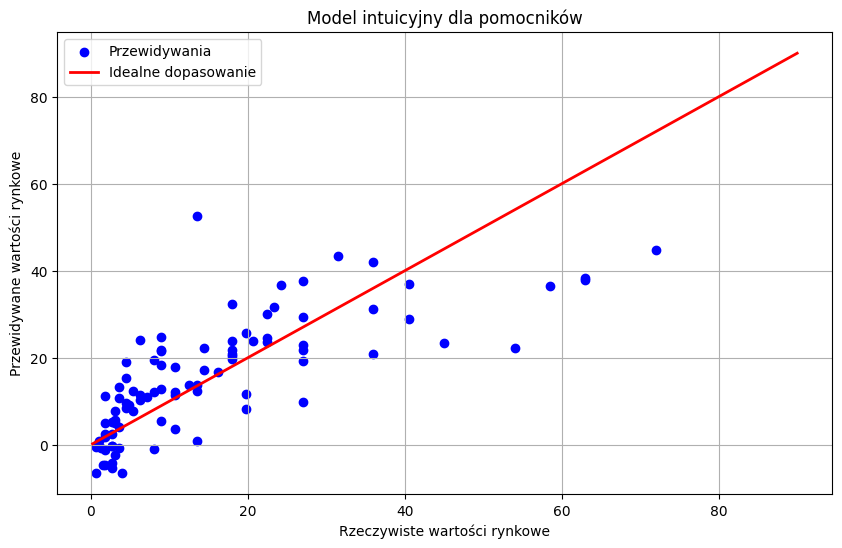

In [177]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Przewidywania' )
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', lw=2, label='Idealne dopasowanie') 
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title(f'Model intuicyjny dla pomocników')
plt.legend()
plt.grid(True)
plt.show()

PRZESKALOWANE

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Przygotowanie listy kolumn

print(len(selected_columns))

# Wybór danych
X = df_midfielders[selected_columns]
y = df_midfielders['Value']

# Podział na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Resetowanie indeksów
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Inicjalizacja i dopasowanie StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konwersja przeskalowanych danych z powrotem do DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Dodanie kolumny stałej
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)

# Tworzenie i dopasowanie modelu OLS
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()
print(results.summary())

# Predykcja na zbiorze testowym i obliczenie RMSE
y_pred = results.predict(X_test_scaled_with_const)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Ustawienie squared=False daje pierwiastek błędu średniokwadratowego
print(f"\nRMSE: {rmse:.2f}")

25
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     28.51
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           3.11e-68
Time:                        16:23:58   Log-Likelihood:                -1309.3
No. Observations:                 364   AIC:                             2671.
Df Residuals:                     338   BIC:                             2772.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ATTACKERS

In [179]:
selected_columns = common_selected_columns + ['Own Goals', 'Total Loose Balls Recovered', 'xG', 'xA', 'Shot-Creating Actions/90', 'Dribbles Leading to Shot Attempt', 'Passes Leading to Goals', 'Carries into Attacking Penalty Box','% of Times Successfully Received Pass','Number of Presses in Attacking Third', 'Fouls Drawn','Penalty Kicks Won','Aerial Duel Won', 'Passes Attempted (Short Passes)', 'Freekick Shots', 'Total Interceptions', 'Total Failed Attempts at Controlling Ball', 'Goals Scored minus xG', 'Mistakes leading to Opponent Shots']
print(len(selected_columns))

25


In [180]:

correlation_matrix = df_ML[selected_columns].corr()

correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  
        if abs(correlation_matrix.iloc[i, j]) > 0.6:  
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)


for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Number of Presses in Attacking Third - Total Failed Attempts at Controlling Ball: 0.86
xA - Passes Leading to Goals: 0.82
Total Loose Balls Recovered - Total Interceptions: 0.77
Dribbles Leading to Shot Attempt - Carries into Attacking Penalty Box: 0.76
xA - Shot-Creating Actions/90: 0.74
xG - Total Failed Attempts at Controlling Ball: 0.74
xG - Number of Presses in Attacking Third: 0.73
Starts - Total Loose Balls Recovered: 0.72
xA - Carries into Attacking Penalty Box: 0.69
% of Times Successfully Received Pass - Total Failed Attempts at Controlling Ball: -0.69
Carries into Attacking Penalty Box - Total Failed Attempts at Controlling Ball: 0.69
% of Times Successfully Received Pass - Number of Presses in Attacking Third: -0.68
xA - Number of Presses in Attacking Third: 0.66
Dribbles Leading to Shot Attempt - Total Failed Attempts at Controlling Ball: 0.65
Carries into Attacking Penalty Box - Number of Presses in Attacking Third: 0.65
xG - Carries into Attacking Penalty Box: 0.64
Shot-

In [181]:


X = df_attackers[selected_columns]
y = df_attackers['Value']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, random_state=42
                                                   )

X_train_with_const = sm.add_constant(X_train)  


model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

print(results.summary())


vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print(vif_data)

X_test_with_const = sm.add_constant(X_test)  
y_pred = results.predict(X_test_with_const)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
print(f"\nRMSE: {rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     31.67
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.10e-70
Time:                        16:23:58   Log-Likelihood:                -1256.9
No. Observations:                 338   AIC:                             2566.
Df Residuals:                     312   BIC:                             2665.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


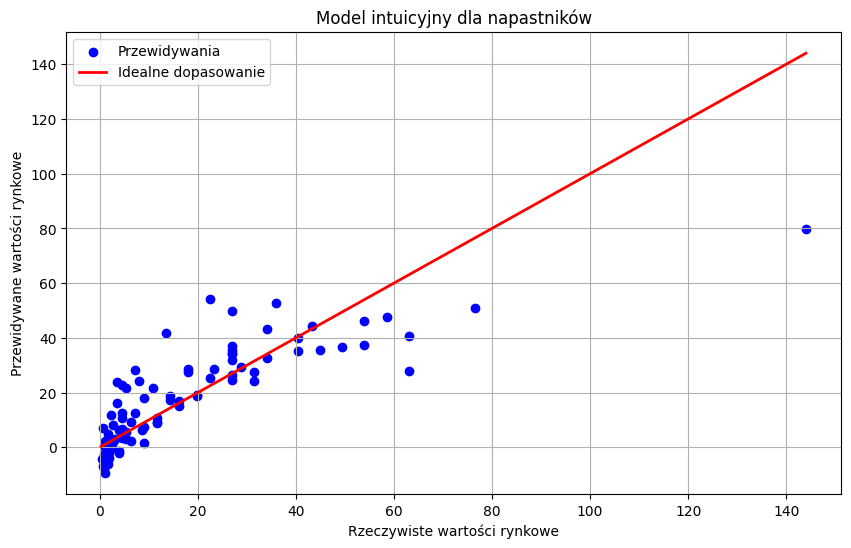

In [182]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Przewidywania' )
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', lw=2, label='Idealne dopasowanie') 
plt.xlabel('Rzeczywiste wartości rynkowe')
plt.ylabel('Przewidywane wartości rynkowe')
plt.title(f'Model intuicyjny dla napastników')
plt.legend()
plt.grid(True)
plt.show()